In [21]:
# Import Pipeline class and datasets
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.data.psychsignal import stocktwits
from quantopian.pipeline.data import Fundamentals
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.data import morningstar


# Import built-in moving average calculation
from quantopian.pipeline.factors import SimpleMovingAverage

# Import built-in trading universe
from quantopian.pipeline.experimental import QTradableStocksUS
from quantopian.pipeline.data.factset.estimates import PeriodicConsensus

def make_pipeline():
    # Create a reference to our trading universe
    base_universe = QTradableStocksUS()
    
    Asset_Growth_1d = Returns(window_length=2);
    Asset_Growth_5d = Returns(window_length=6);
    Asset_Growth_7d = Returns(window_length=8);
    Asset_Growth_10d = Returns(window_length=11);

    # Get latest closing price
    close_price = USEquityPricing.close.latest
    
    value = Fundamentals.ebit.latest / Fundamentals.enterprise_value.latest
    quality = Fundamentals.roe.latest

    # Calculate 3 day average of bull_minus_bear scores
    
    sentiment_score_3 = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear],
        window_length=3,
    )
    sentiment_score_5 = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear],
        window_length=5,
    )
    sentiment_score_7 = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear],
        window_length=7,
    )
    
    fq1_eps_cons = PeriodicConsensus.slice('EPS', 'qf', 1)
    consensus = fq1_eps_cons.mean.latest
    
    revenue = Fundamentals.total_revenue.latest
    revenue_3 = SimpleMovingAverage(
        inputs=[Fundamentals.total_revenue],
        window_length=3,
    )
    revenue_5 = SimpleMovingAverage(
        inputs=[Fundamentals.total_revenue],
        window_length=5,
    )
    revenue_7 = SimpleMovingAverage(
        inputs=[Fundamentals.total_revenue],
        window_length=7,
    )
    
    eveb = morningstar.valuation_ratios.ev_to_ebitda.latest
    
    eveb_3 = SimpleMovingAverage(
        inputs=[morningstar.valuation_ratios.ev_to_ebitda],
        window_length=3,
    )
    eveb_5 = SimpleMovingAverage(
        inputs=[morningstar.valuation_ratios.ev_to_ebitda],
        window_length=5,
    )
    eveb_7 = SimpleMovingAverage(
        inputs=[morningstar.valuation_ratios.ev_to_ebitda],
        window_length=7,
    )
    
    cash_return = morningstar.valuation_ratios.cash_return.latest
    
    cash_return_3 = SimpleMovingAverage(
        inputs=[morningstar.valuation_ratios.cash_return],
        window_length=3,
    )
    cash_return_5 = SimpleMovingAverage(
        inputs=[morningstar.valuation_ratios.cash_return],
        window_length=5,
    )
    cash_return_7 = SimpleMovingAverage(
        inputs=[morningstar.valuation_ratios.cash_return],
        window_length=7,
    )
    
    total_yield = morningstar.valuation_ratios.total_yield.latest
    
    total_yield_3 = SimpleMovingAverage(
        inputs=[morningstar.valuation_ratios.total_yield],
        window_length=3,
    )
    total_yield_5 = SimpleMovingAverage(
        inputs=[morningstar.valuation_ratios.total_yield],
        window_length=5,
    )
    total_yield_7 = SimpleMovingAverage(
        inputs=[morningstar.valuation_ratios.total_yield],
        window_length=7,
    )
    
    
    sma_25 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=25, mask = base_universe)
    
    sma_100 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=100, mask = base_universe)
    
   
    
    value_winsorized = value.winsorize(min_percentile=0.05, max_percentile=0.95)
    quality_winsorized = quality.winsorize(min_percentile=0.05, max_percentile=0.95)
    sentiment_score_winsorized_3 = sentiment_score_3.winsorize(min_percentile=0.05, max_percentile=0.95)
    sentiment_score_winsorized_5 = sentiment_score_5.winsorize(min_percentile=0.05, max_percentile=0.95)
    sentiment_score_winsorized_7 = sentiment_score_7.winsorize(min_percentile=0.05, max_percentile=0.95)
    Asset_Growth_7d_winsorized = Asset_Growth_7d.winsorize(min_percentile=0.05, max_percentile=0.95)
    revenue_winsorized = revenue.winsorize(min_percentile=0.05, max_percentile=0.95)
    revenue_winsorized_3 = revenue_3.winsorize(min_percentile=0.05, max_percentile=0.95)
    revenue_winsorized_5 = revenue_5.winsorize(min_percentile=0.05, max_percentile=0.95)
    revenue_winsorized_7 = revenue_7.winsorize(min_percentile=0.05, max_percentile=0.95)
    eveb_winsorized = eveb.winsorize(min_percentile=0.05, max_percentile=0.95)
    eveb_winsorized_3 = eveb_3.winsorize(min_percentile=0.05, max_percentile=0.95)
    eveb_winsorized_5 = eveb_5.winsorize(min_percentile=0.05, max_percentile=0.95)
    eveb_winsorized_7 = eveb_7.winsorize(min_percentile=0.05, max_percentile=0.95)
    cash_return_winsorized = cash_return.winsorize(min_percentile=0.05, max_percentile=0.95)
    cash_return_winsorized_3 = cash_return_3.winsorize(min_percentile=0.05, max_percentile=0.95)
    cash_return_winsorized_5 = cash_return_5.winsorize(min_percentile=0.05, max_percentile=0.95)
    cash_return_winsorized_7 = cash_return_7.winsorize(min_percentile=0.05, max_percentile=0.95)
    total_yield_winsorized = total_yield.winsorize(min_percentile=0.05, max_percentile=0.95)
    total_yield_winsorized_3 = total_yield_3.winsorize(min_percentile=0.05, max_percentile=0.95)
    total_yield_winsorized_5 = total_yield_5.winsorize(min_percentile=0.05, max_percentile=0.95)
    total_yield_winsorized_7 = total_yield_7.winsorize(min_percentile=0.05, max_percentile=0.95)
    sma_25_winsorized = sma_25.winsorize(min_percentile=0.05, max_percentile=0.95)
    sma_100_winsorized = sma_100.winsorize(min_percentile=0.05, max_percentile=0.95)
    
    combined_factor = (
        value_winsorized.zscore() + 
        quality_winsorized.zscore() + 
        sentiment_score_winsorized_7.zscore()
    )
    
    combined_factor_2 = (
        
        -quality_winsorized.zscore()-     
        sentiment_score_winsorized_7.zscore()
    )
    
    combined_factor_3 = (
        quality_winsorized.zscore()+     
        sentiment_score_winsorized_7.zscore() +
        Asset_Growth_7d_winsorized.zscore()
    )
    combined_factor_4 = (   
        -sentiment_score_winsorized_7.zscore() +
        -Asset_Growth_7d_winsorized.zscore()
    )
    

    # Return Pipeline containing close_price and
    # sentiment_score that has our trading universe as screen
    return Pipeline(
        columns={
            'Asset Growth 1d': Asset_Growth_1d,
            'Asset Growth 5d': Asset_Growth_5d,
            'Asset Growth 7d': Asset_Growth_7d,
            'Asset Growth 10d': Asset_Growth_10d,
            'close_price': close_price,
            'value': value_winsorized,
            'quality': quality_winsorized,
            'sentiment_score_3': sentiment_score_winsorized_3,
            'sentiment_score_5': sentiment_score_winsorized_5,
            'sentiment_score_7': sentiment_score_winsorized_7,
            'combined_factor': combined_factor,
            'combined_factor_2': combined_factor_2,
            'combined_factor_3': combined_factor_3,
            'combined_factor_4': combined_factor_4,
            'consensus': consensus,
            'revenue': revenue_winsorized,
            'revenue_3': revenue_winsorized_3,
            'revenue_5': revenue_winsorized_5,
            'revenue_7': revenue_winsorized_7,
            'eveb': eveb_winsorized,
            'eveb_3': eveb_winsorized_3,
            'eveb_5': eveb_winsorized_5,
            'eveb_7': eveb_winsorized_7,
            'cash_return': cash_return_winsorized,
            'cash_return_3': cash_return_winsorized_3, 
            'cash_return_5': cash_return_winsorized_5, 
            'cash_return_7': cash_return_winsorized_7,
            'total_yield': total_yield_winsorized,
            'total_yield_3': total_yield_winsorized_3,
            'total_yield_5': total_yield_winsorized_5,
            'total_yield_7': total_yield_winsorized_7,
            'sma_25': sma_25_winsorized,
            'sma_100': sma_100_winsorized
            
        },
        screen=base_universe & sentiment_score_3.notnull() & quality.notnull() & value.notnull(),
    )

In [22]:
# Import run_pipeline method
from quantopian.research import run_pipeline

# Specify a time range to evaluate
period_start = '2015-11-01'
period_end = '2017-11-01'

# Execute pipeline over evaluation period
pipeline_output = run_pipeline(
    make_pipeline(),
    start_date=period_start,
    end_date=period_end
)

In [23]:
tam = pipeline_output.index.size
import numpy as np
import matplotlib.pyplot as plt
# Compute the returns of each basket
# Baskets of size 500, so we create an empty array of shape (10000/500)
basket_size = 50000
number_of_baskets = int(tam/basket_size)
basket_returns = np.zeros(number_of_baskets)

import alphalens as al
from quantopian.research import prices
import pandas as pd

# Get list of unique assets from the pipeline output
asset_list = pipeline_output.index.levels[1].unique()

# Query pricing data for all assets present during
# evaluation period
asset_prices = prices(
    asset_list,
    start=period_start,
    end=period_end
)

#VALUE

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


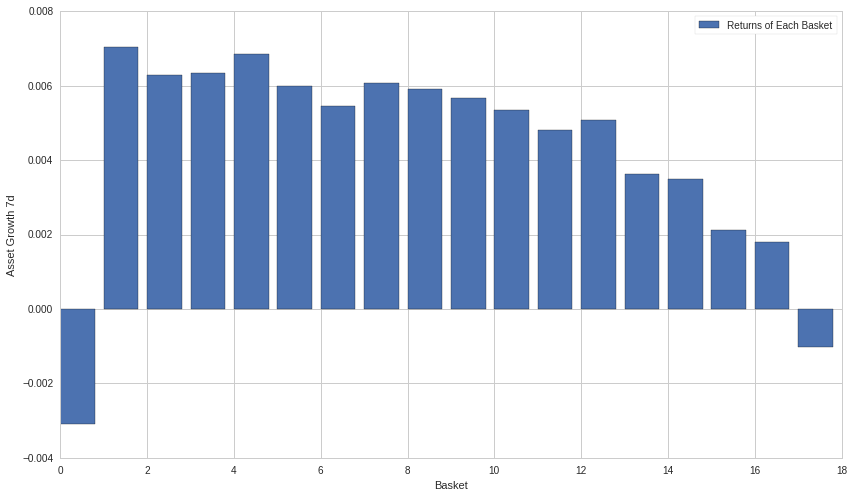

In [4]:
# Rank the equities
ranked_data = pipeline_output.sort('value')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


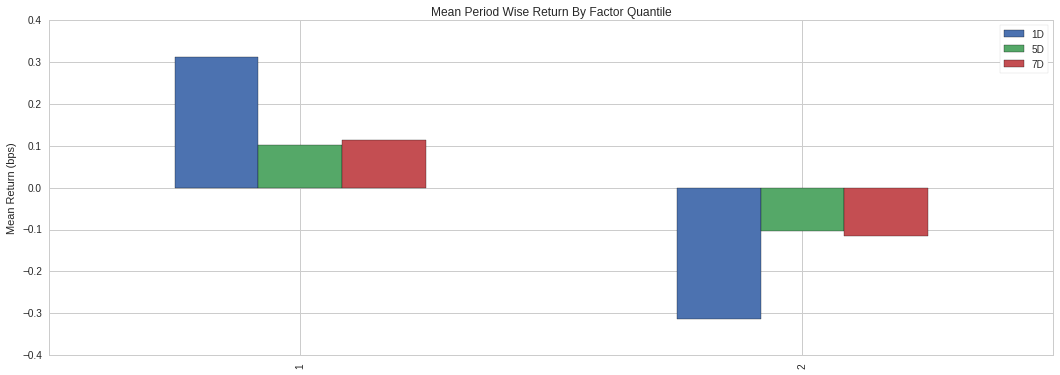

In [5]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['value'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

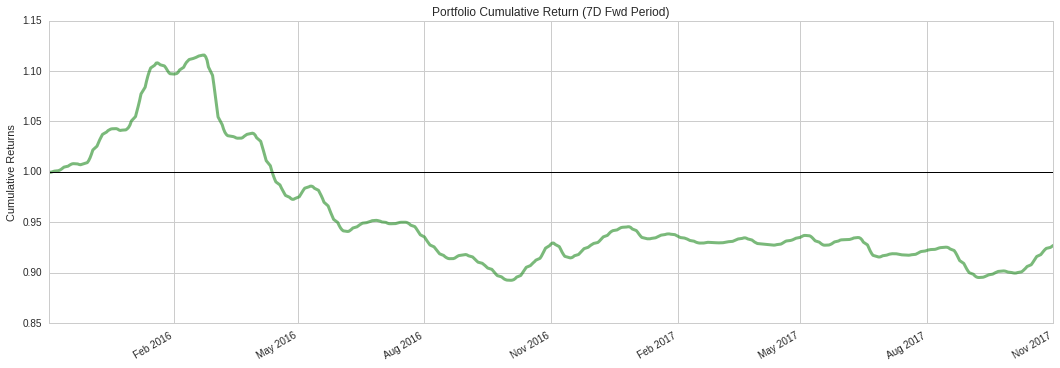

In [6]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#QUALITY

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


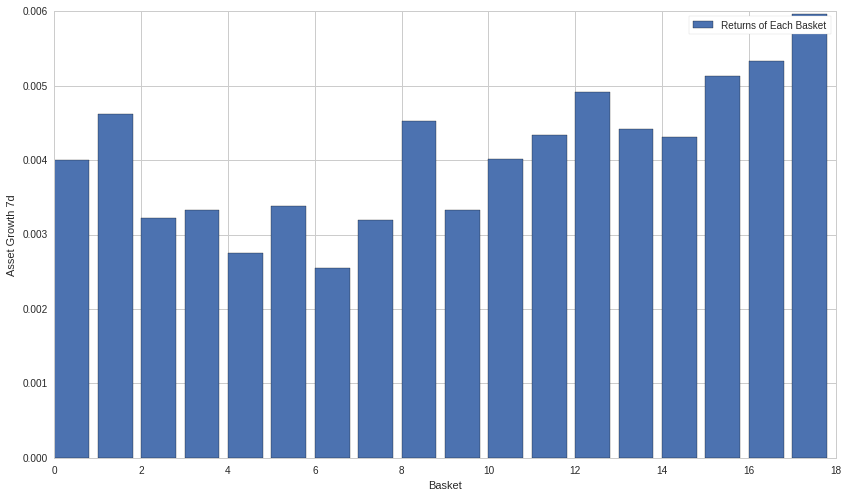

In [7]:
# Rank the equities
ranked_data = pipeline_output.sort('quality')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


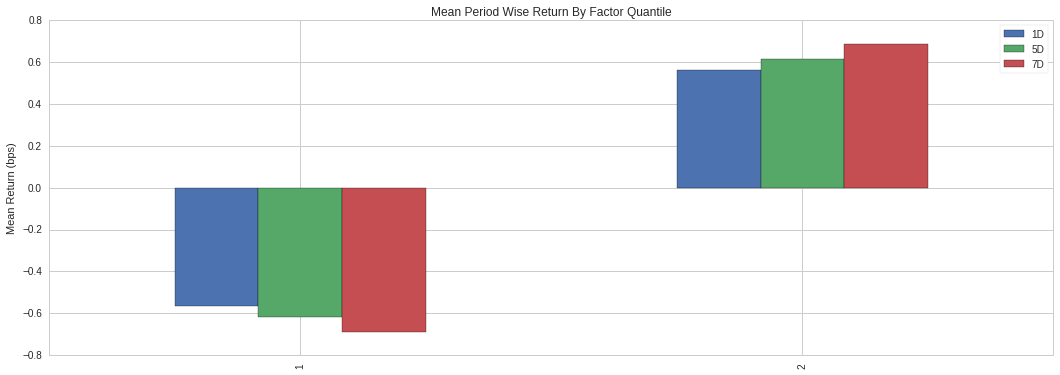

In [8]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['quality'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

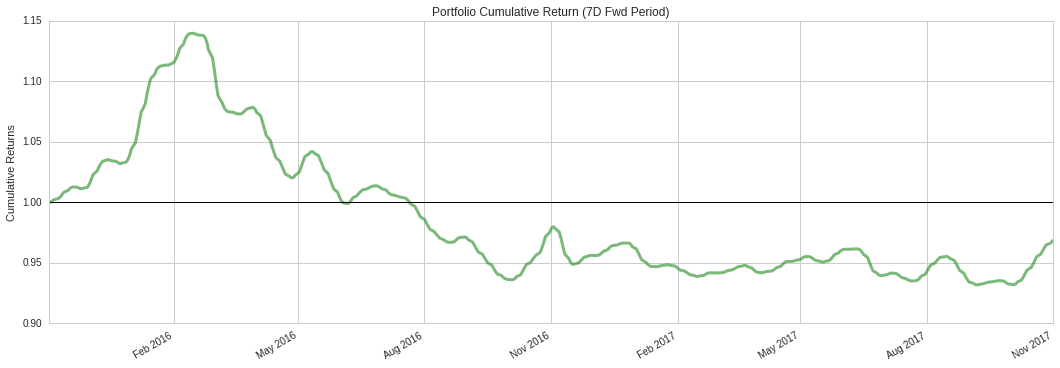

In [9]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#SENTIMENT SCORE 3

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


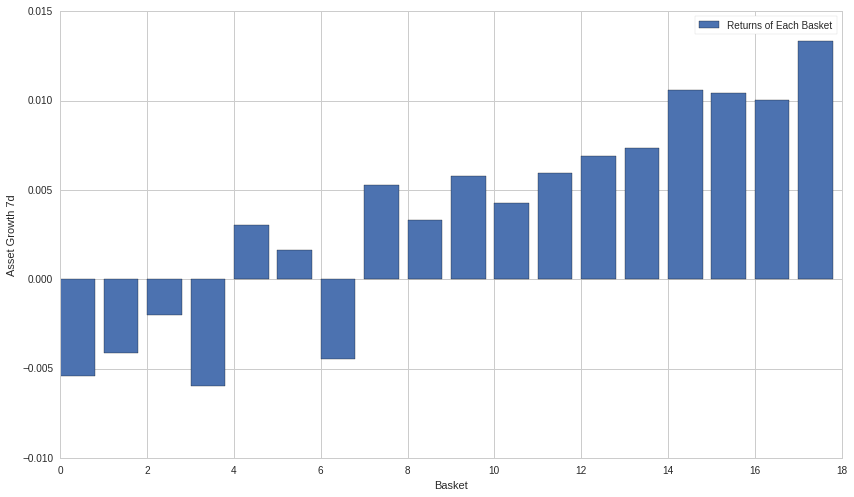

In [10]:
# Rank the equities
ranked_data = pipeline_output.sort('sentiment_score_3')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


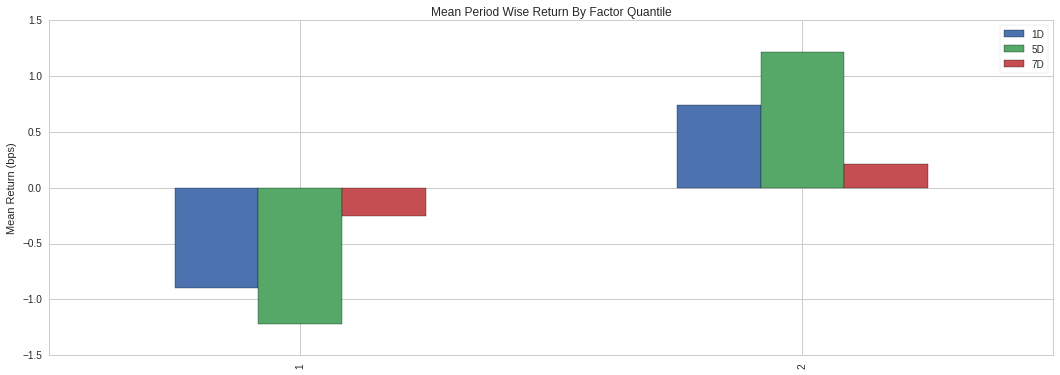

In [11]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['sentiment_score_3'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

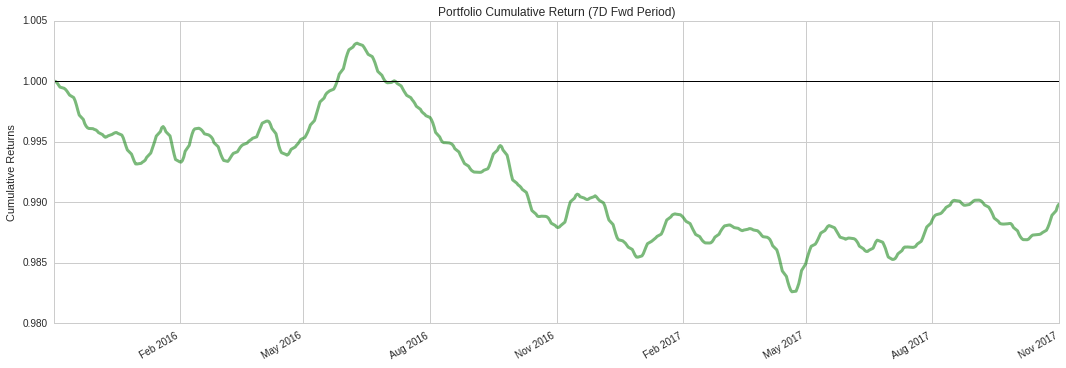

In [12]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#SENTIMENT SCORE 5

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


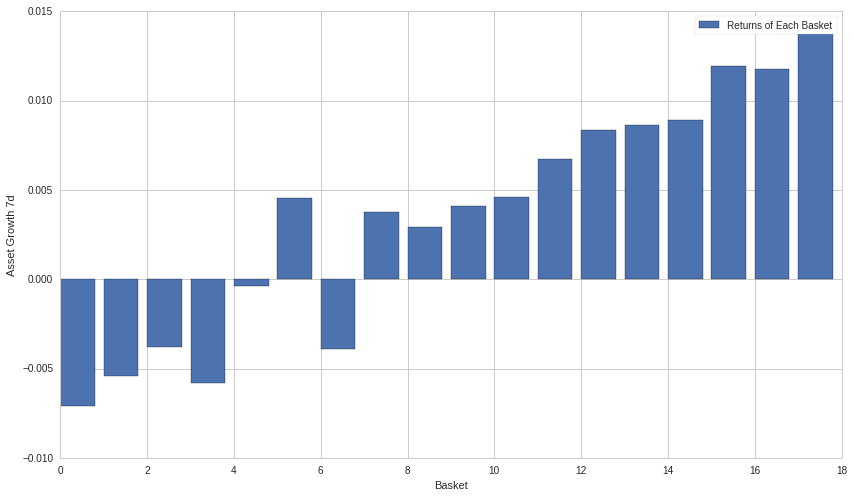

In [13]:
# Rank the equities
ranked_data = pipeline_output.sort('sentiment_score_5')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


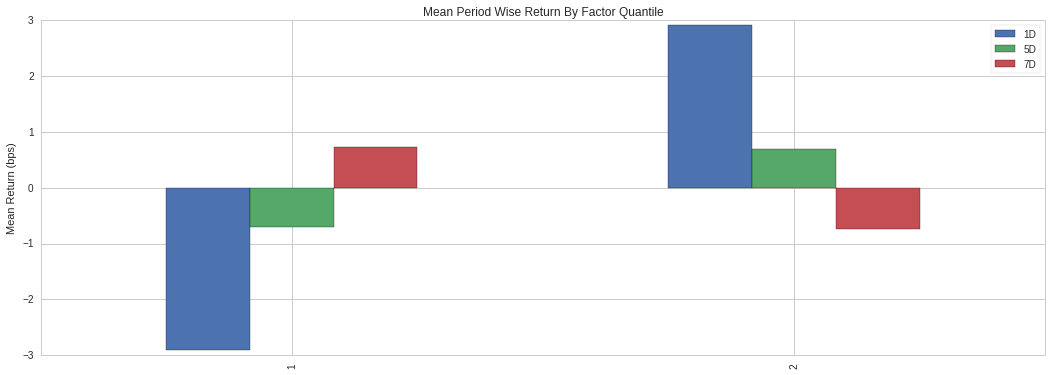

In [14]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['sentiment_score_5'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

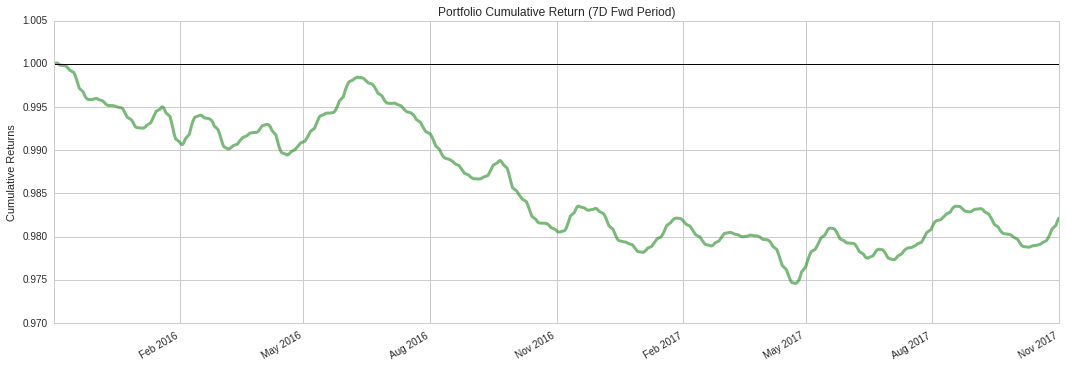

In [15]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#SENTIMENT SCORE 7

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


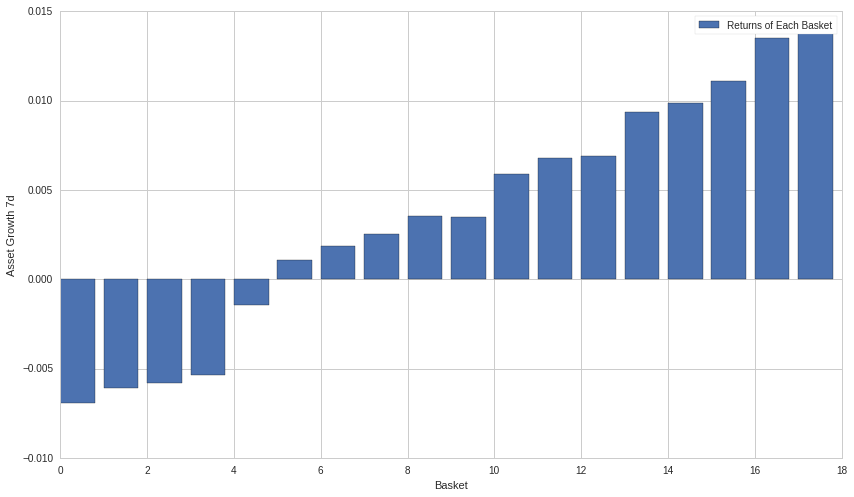

In [16]:
# Rank the equities
ranked_data = pipeline_output.sort('sentiment_score_7')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


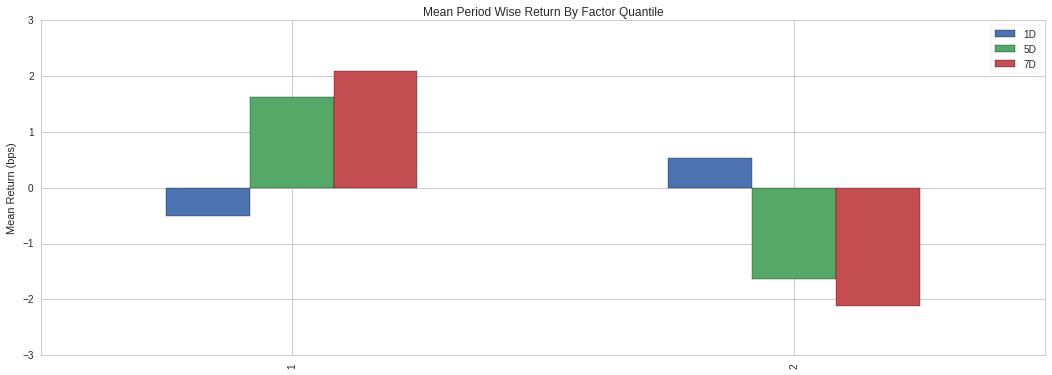

In [17]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['sentiment_score_7'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

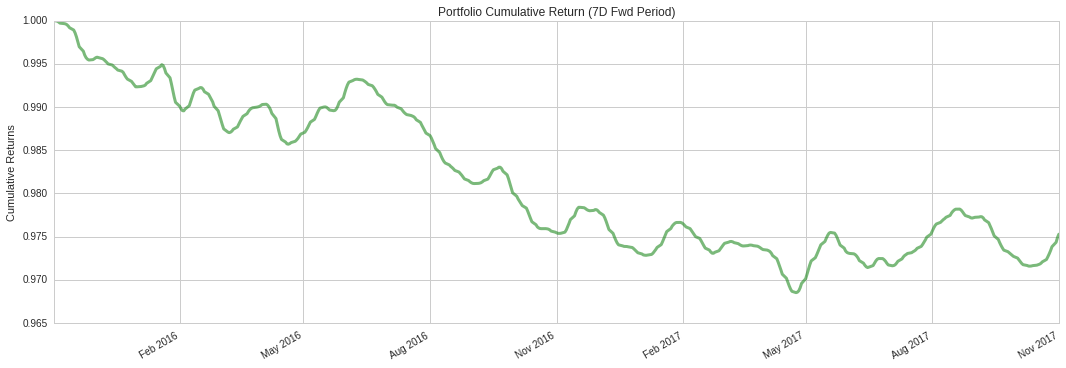

In [18]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#CRECIMIENTO 1 DIA

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


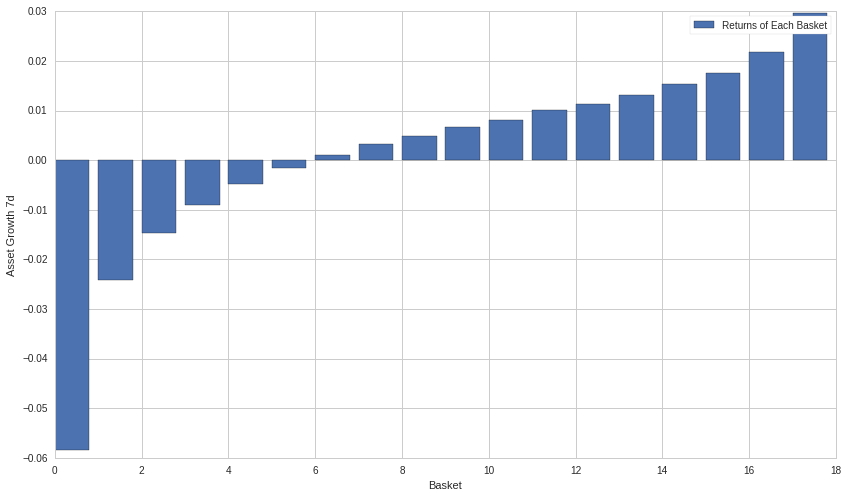

In [19]:
# Rank the equities
ranked_data = pipeline_output.sort('Asset Growth 1d')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


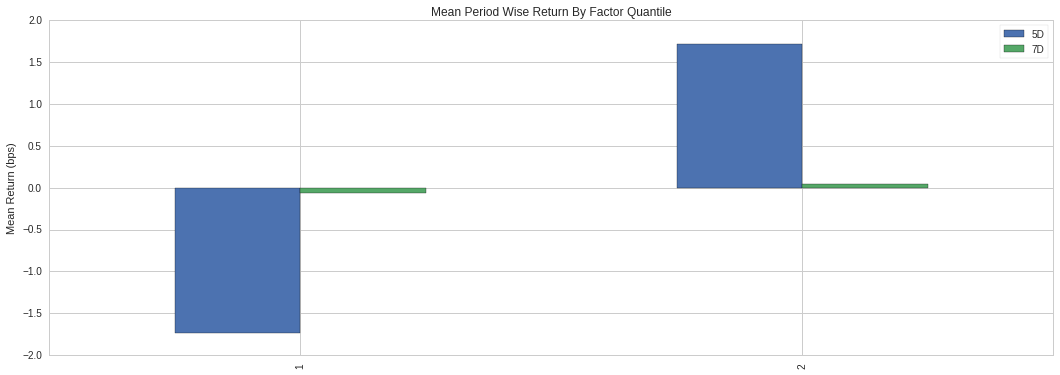

In [45]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['Asset Growth 1d'],
    prices=asset_prices,
    quantiles=2,
    periods=(5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

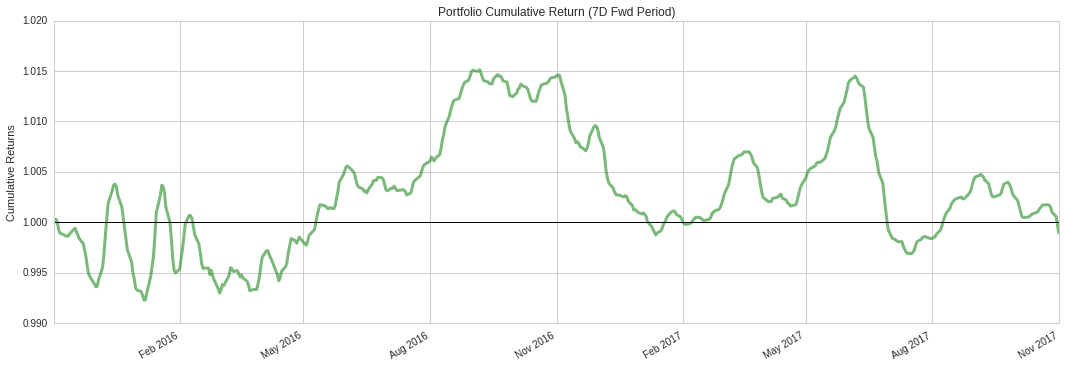

In [21]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#CRECIMIENTO 5 DIAS

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


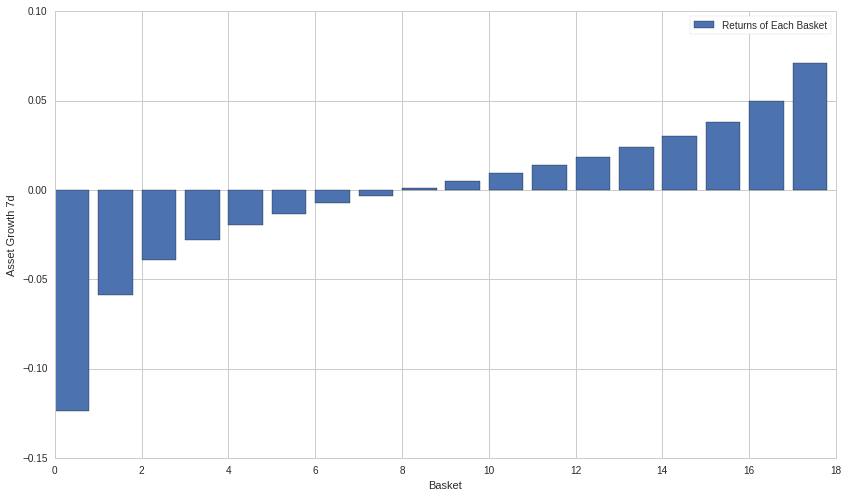

In [22]:
# Rank the equities
ranked_data = pipeline_output.sort('Asset Growth 5d')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


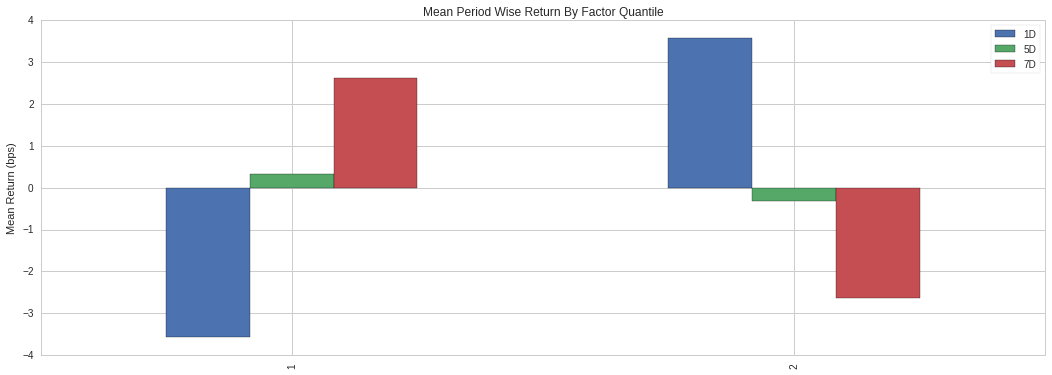

In [23]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['Asset Growth 5d'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

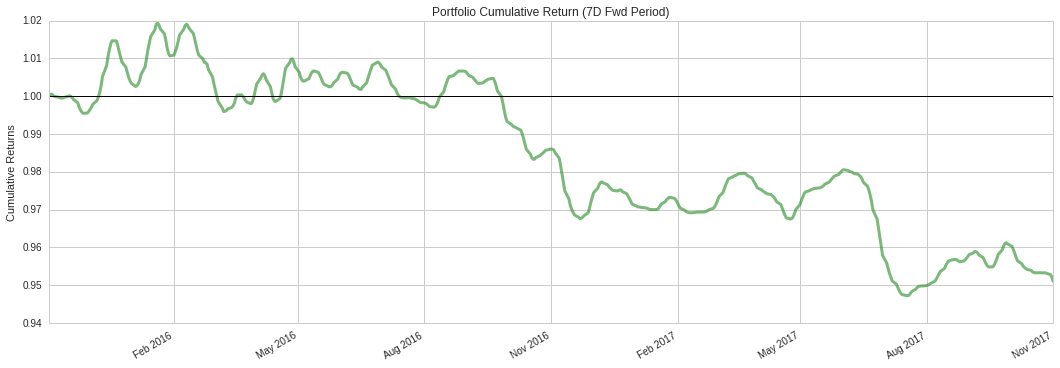

In [24]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#CRECIMIENTO 7 DIAS

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


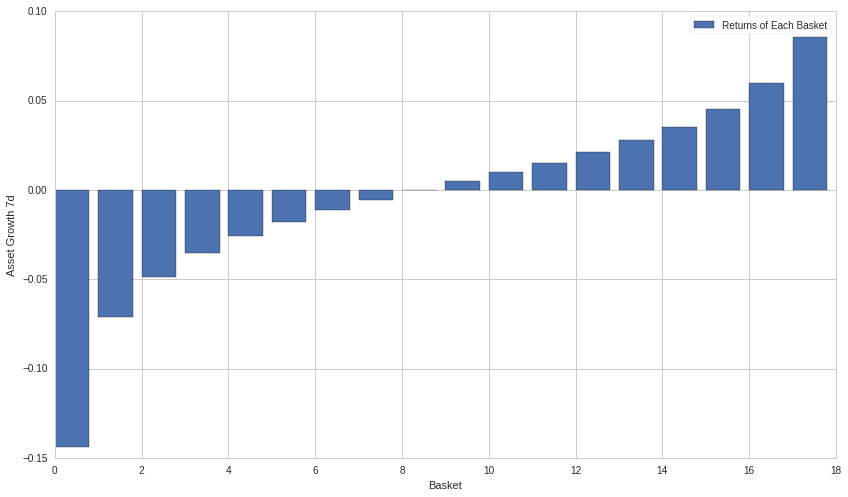

In [25]:
# Rank the equities
ranked_data = pipeline_output.sort('Asset Growth 7d')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


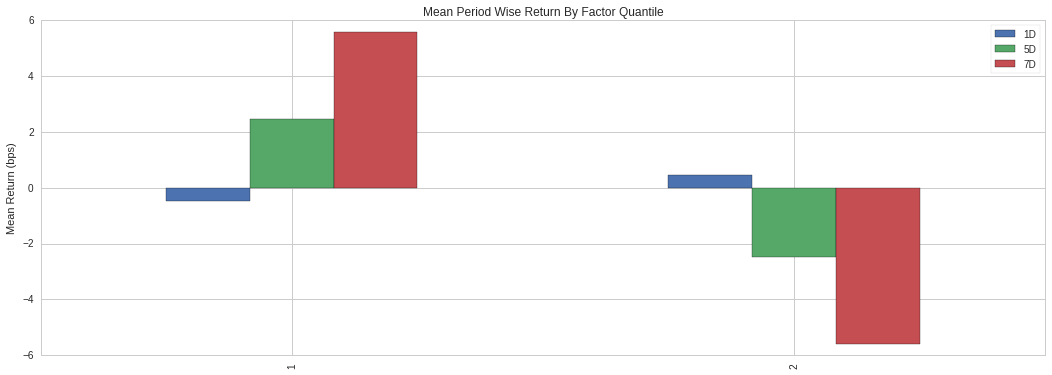

In [26]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['Asset Growth 7d'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

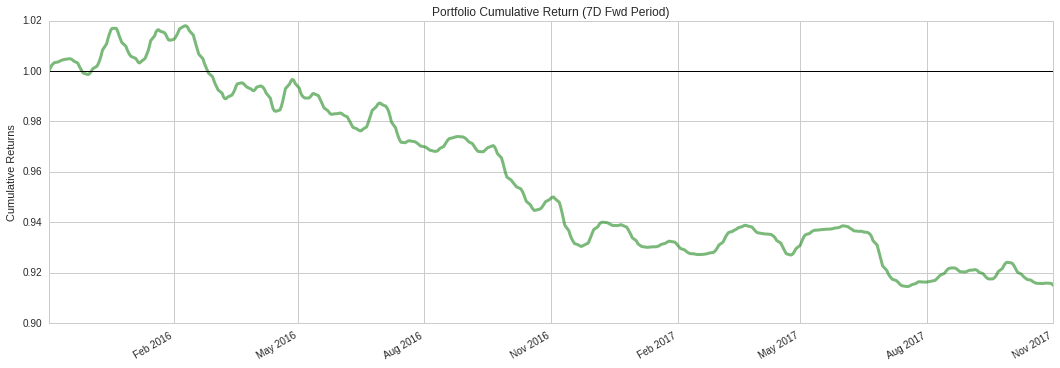

In [27]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#CRECIMIENTO 10 DIAS

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


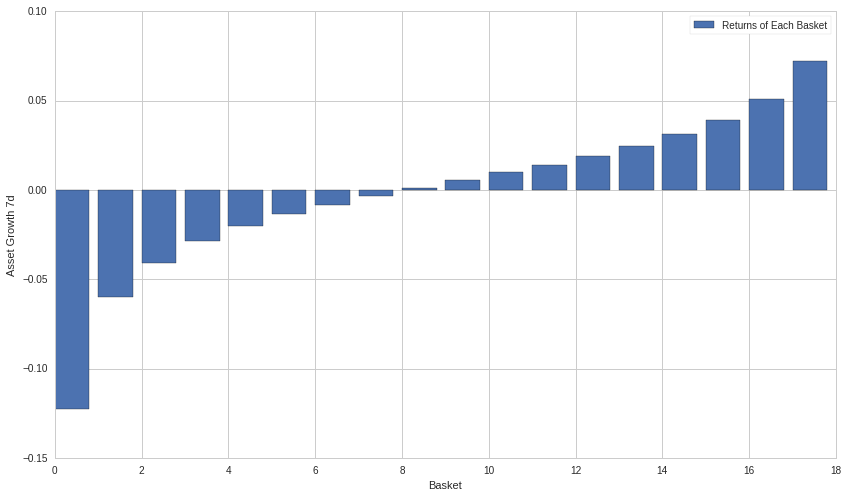

In [28]:
# Rank the equities
ranked_data = pipeline_output.sort('Asset Growth 10d')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


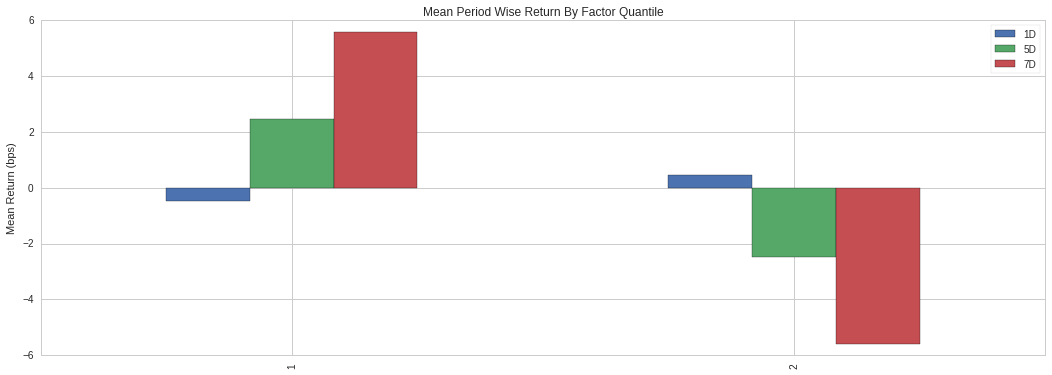

In [29]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['Asset Growth 7d'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

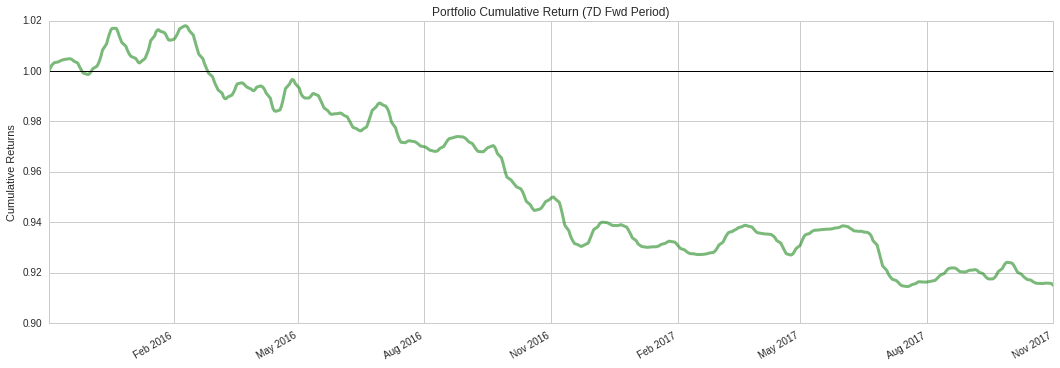

In [30]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#FACTOR COMBINADO 1: 

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


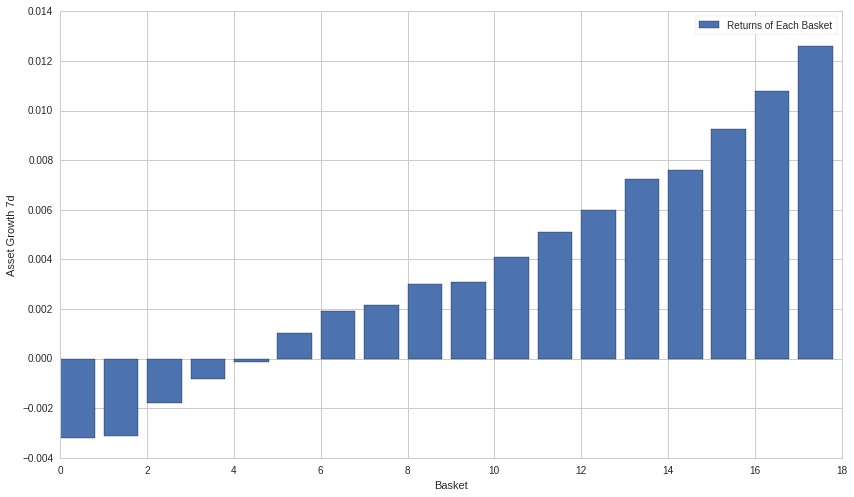

In [33]:
# Rank the equities
ranked_data = pipeline_output.sort('combined_factor')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


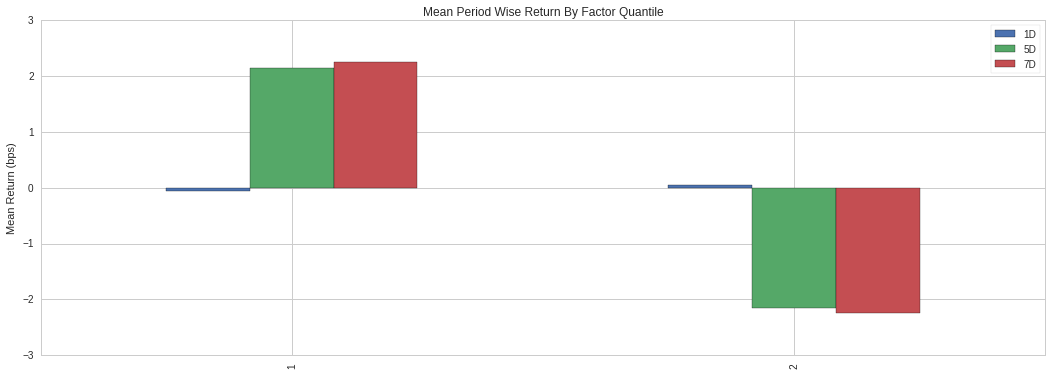

In [34]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['combined_factor'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

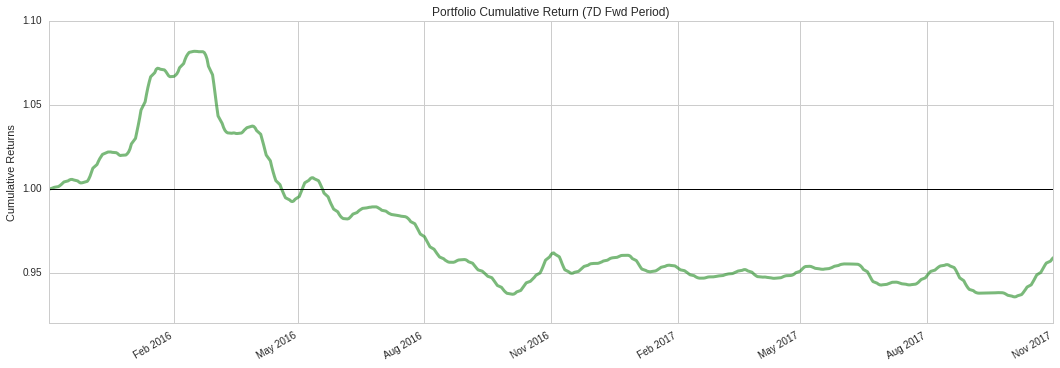

In [35]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#FACTOR COMBINADO 2: 

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


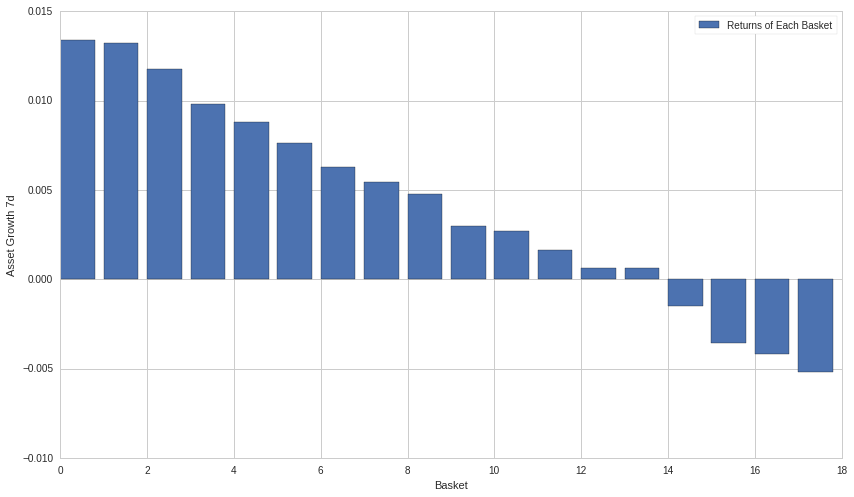

In [36]:
# Rank the equities
ranked_data = pipeline_output.sort('combined_factor_2')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


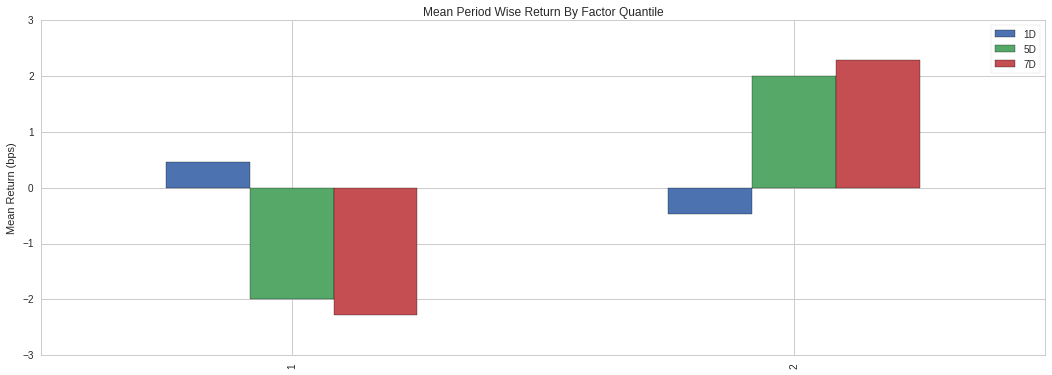

In [37]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['combined_factor_2'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

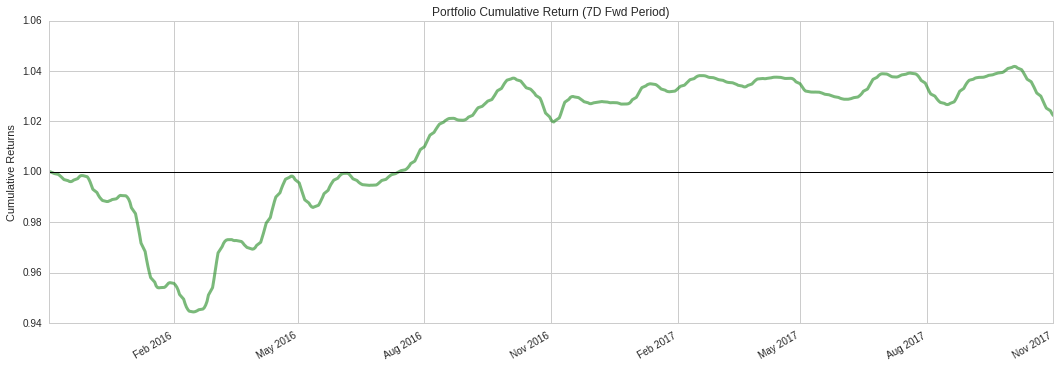

In [38]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#FACTOR COMBINADO 3: 

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


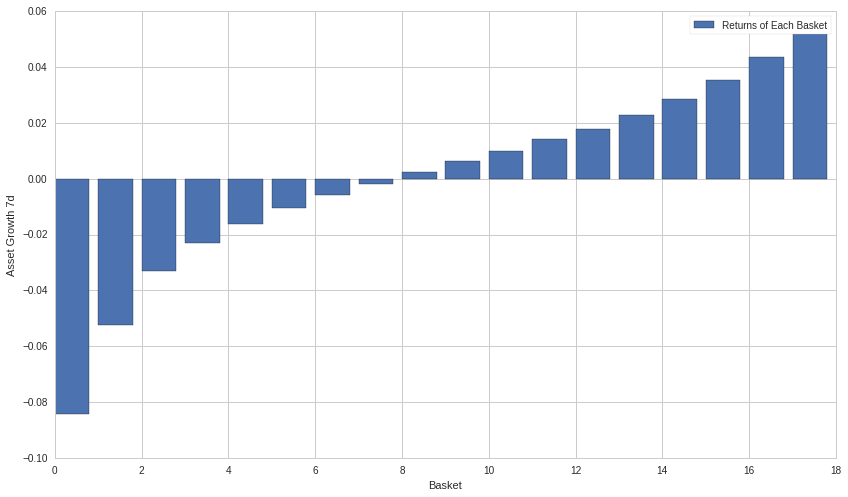

In [39]:
# Rank the equities
ranked_data = pipeline_output.sort('combined_factor_3')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


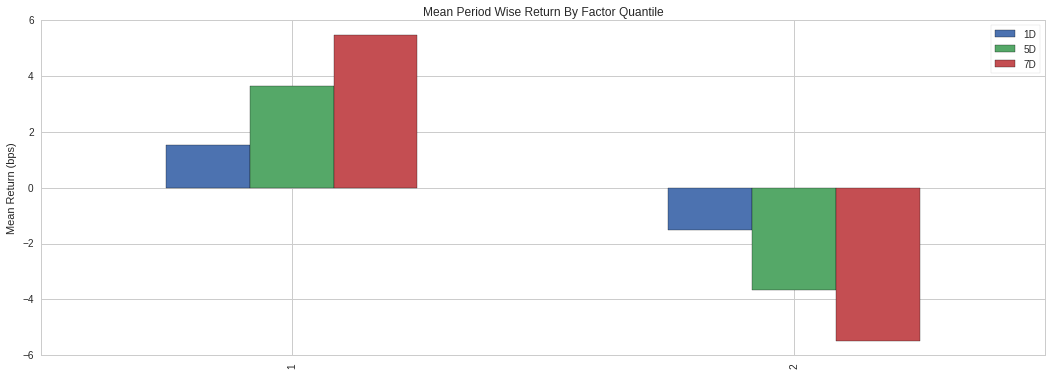

In [40]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['combined_factor_3'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

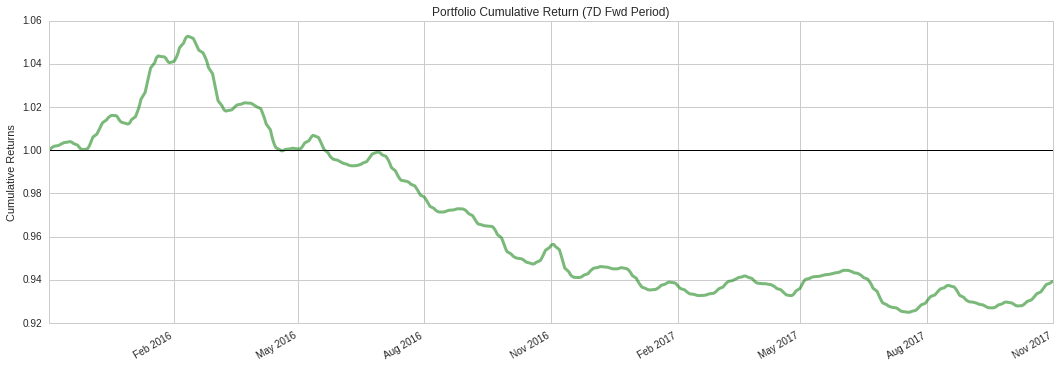

In [41]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#FACTOR COMBINADO 4: 

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


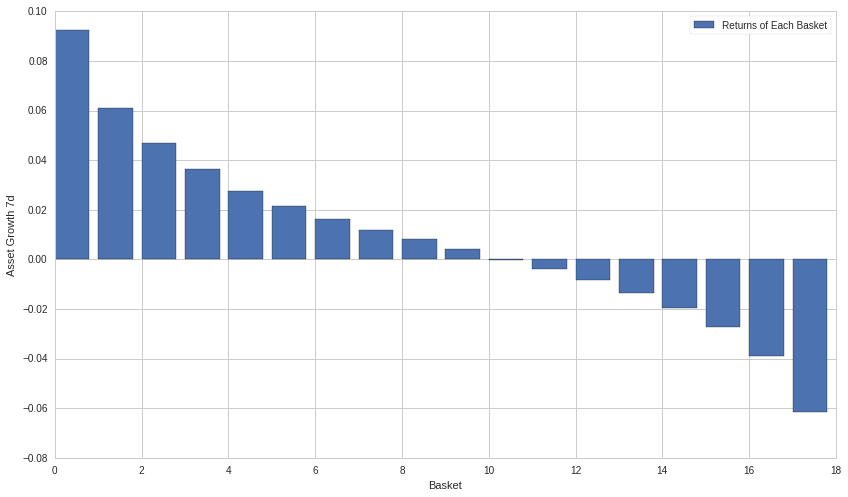

In [42]:
# Rank the equities
ranked_data = pipeline_output.sort('combined_factor_4')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


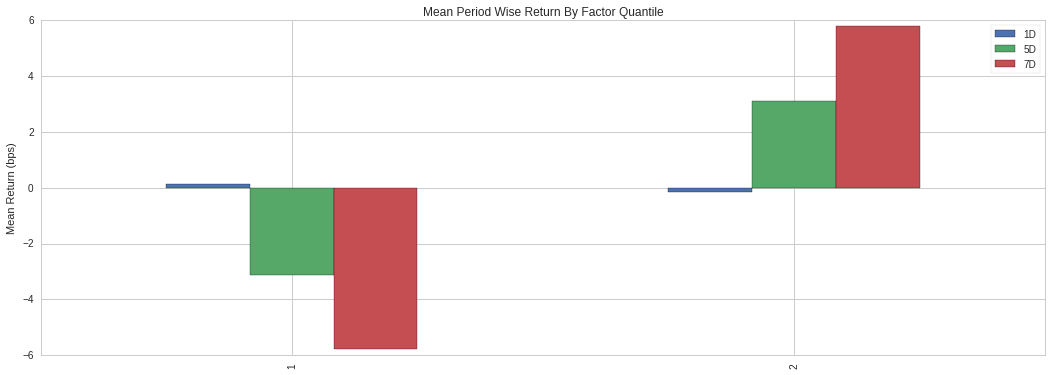

In [43]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['combined_factor_4'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

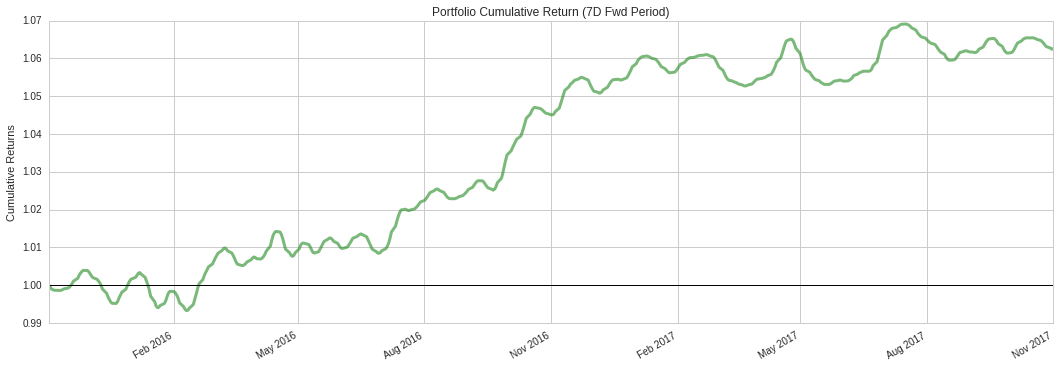

In [44]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#FACTOR COMBINADO 5: 

#CONSENSUS

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


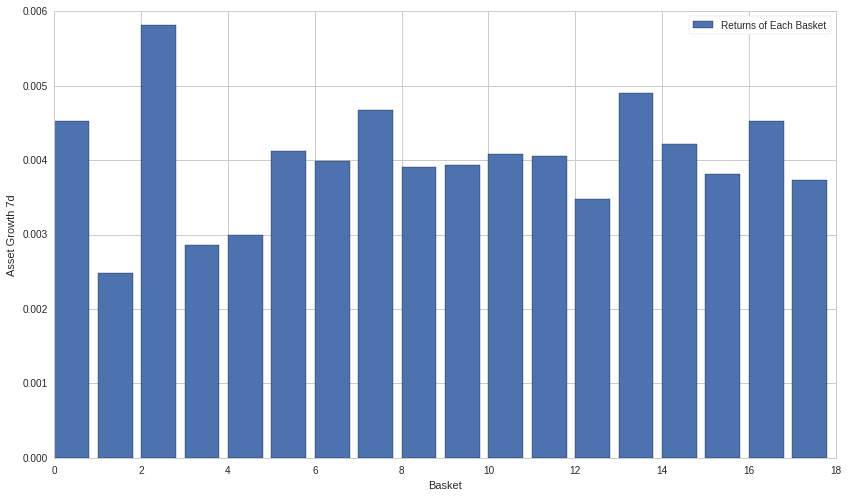

In [54]:
# Rank the equities
ranked_data = pipeline_output.sort('consensus')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 2.3% entries from factor data: 2.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


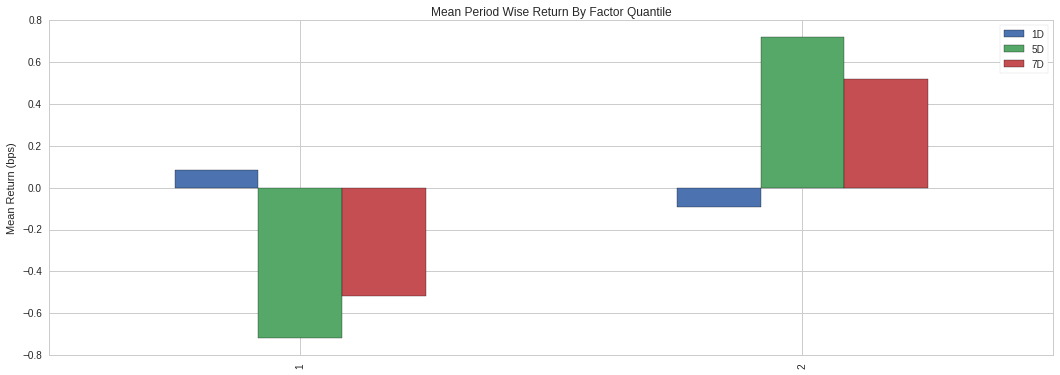

In [55]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['consensus'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

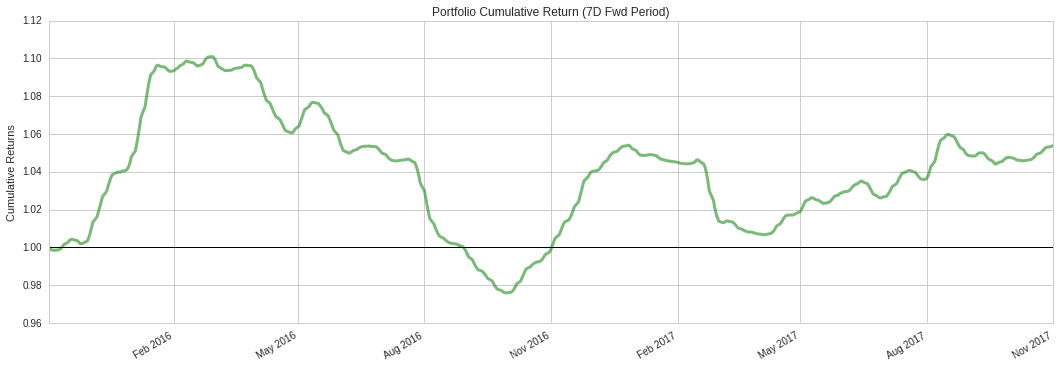

In [56]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#REVENUE

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


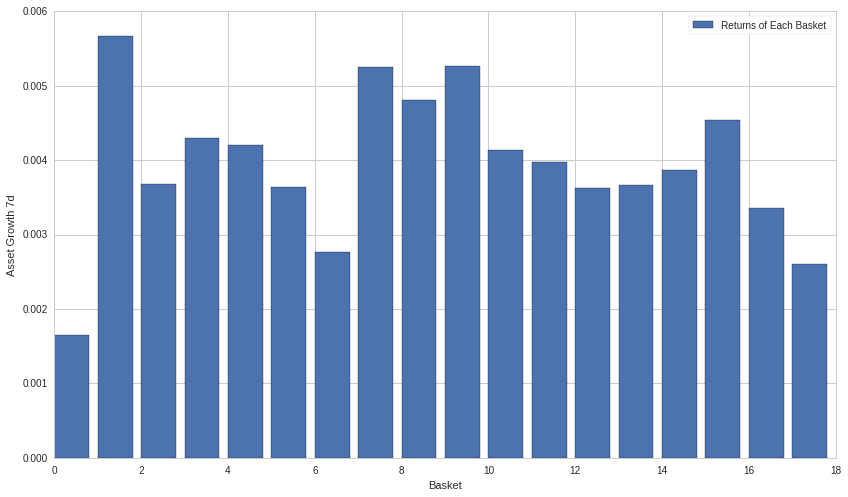

In [63]:
# Rank the equities
ranked_data = pipeline_output.sort('revenue')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


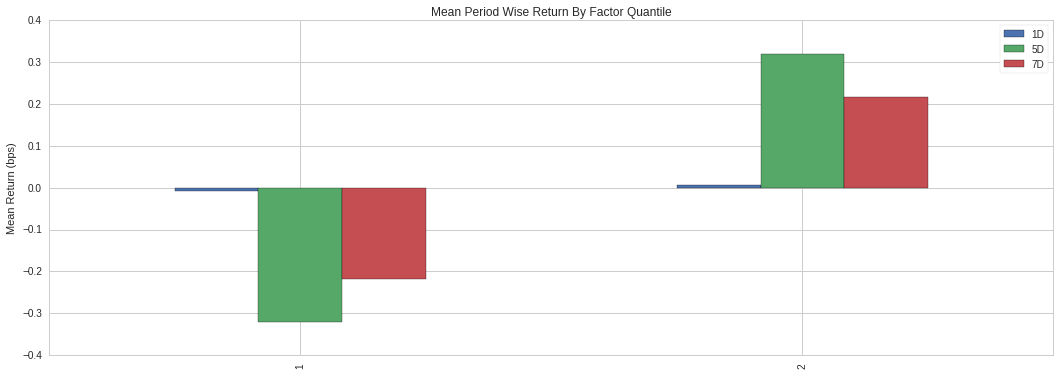

In [64]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['revenue'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

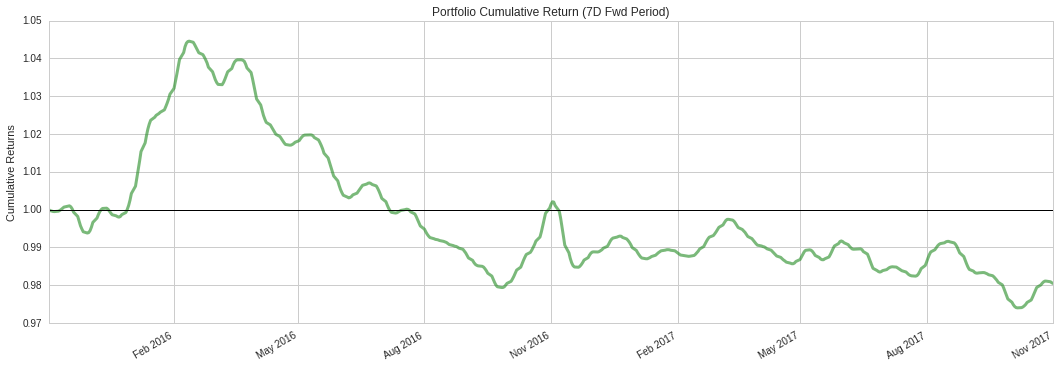

In [65]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#REVENUE 3

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


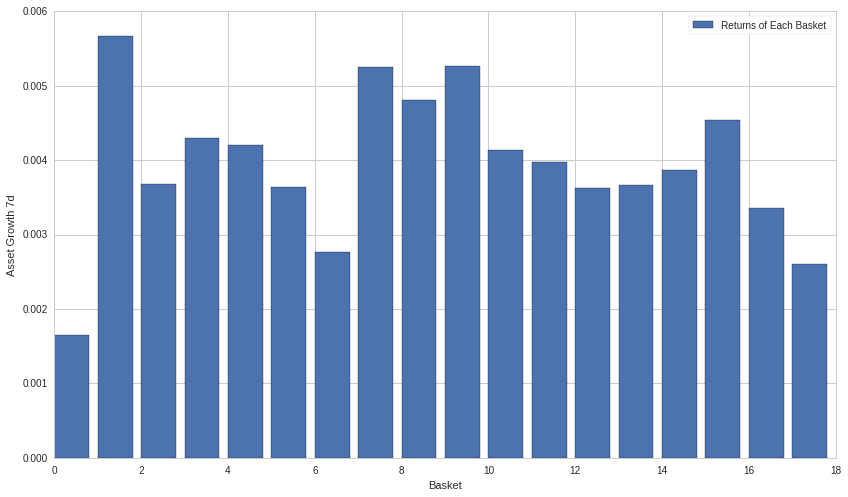

In [66]:
# Rank the equities
ranked_data = pipeline_output.sort('revenue_3')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


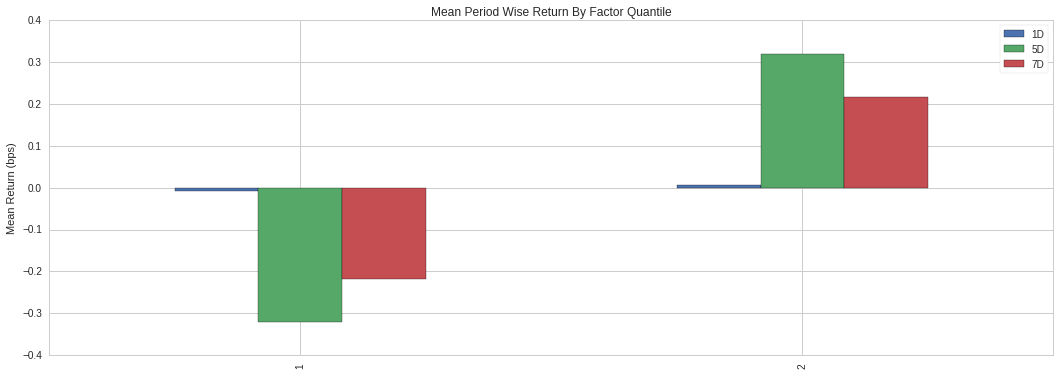

In [67]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['revenue_3'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

In [ ]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#REVENUE 5

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


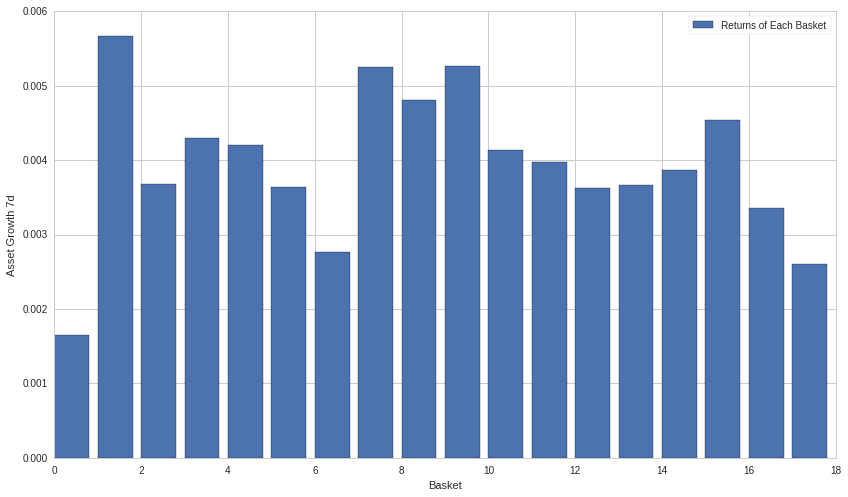

In [68]:
# Rank the equities
ranked_data = pipeline_output.sort('revenue_5')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


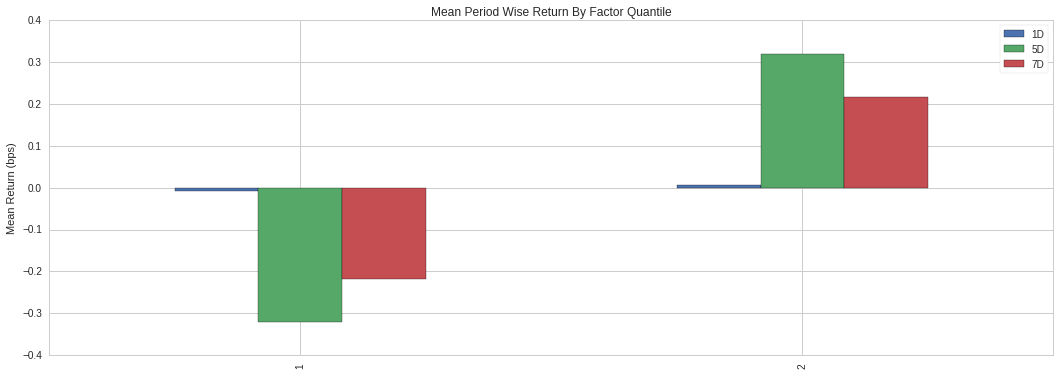

In [69]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['revenue_5'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

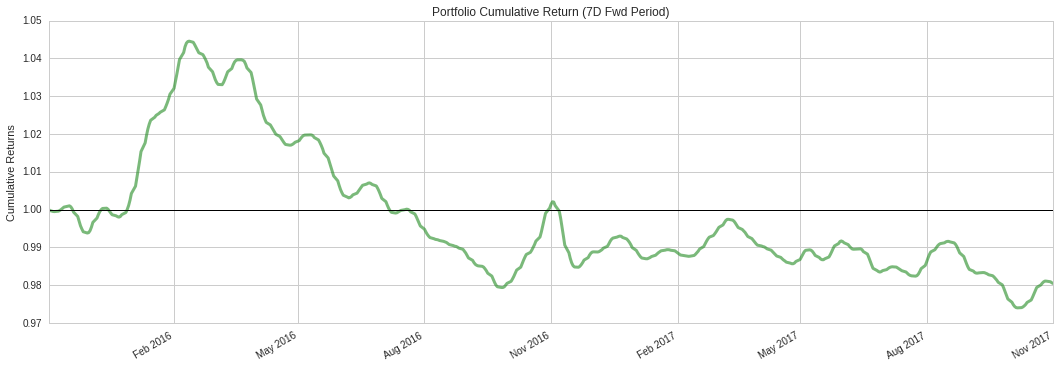

In [70]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#REVENUE 7

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


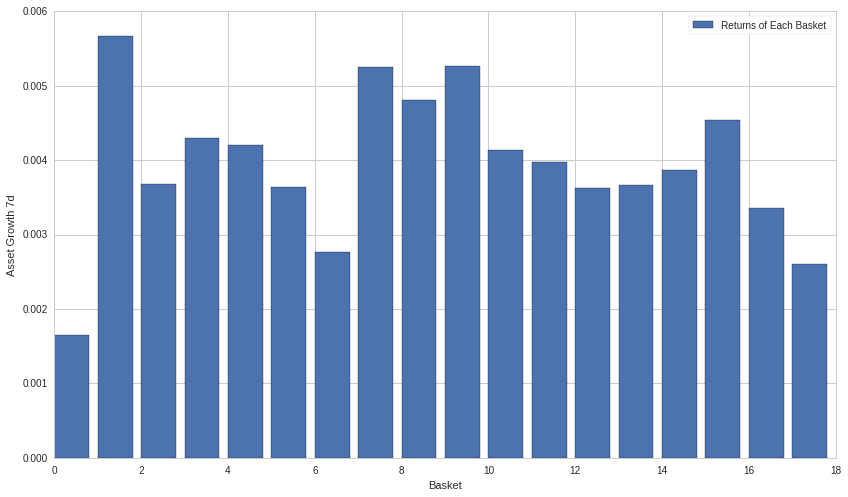

In [71]:
# Rank the equities
ranked_data = pipeline_output.sort('revenue_7')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


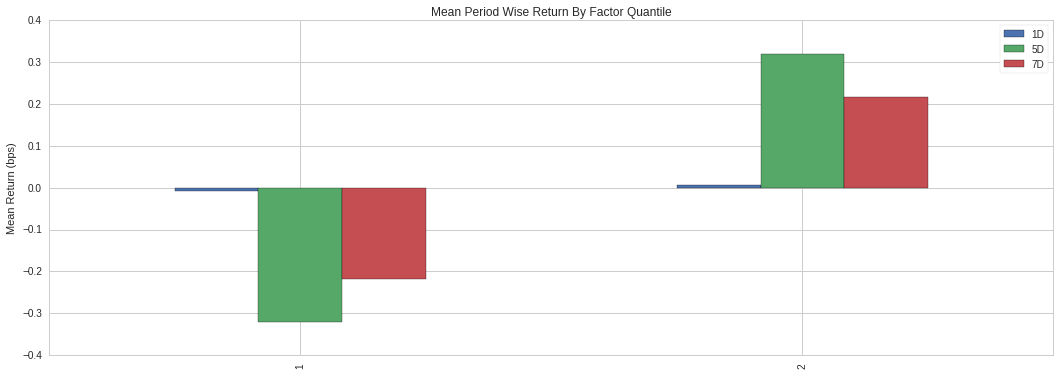

In [72]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['revenue_7'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

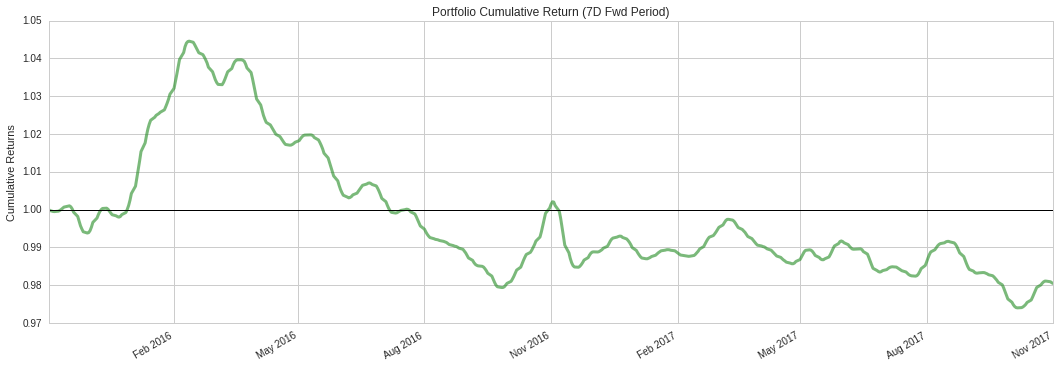

In [73]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#eveb

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


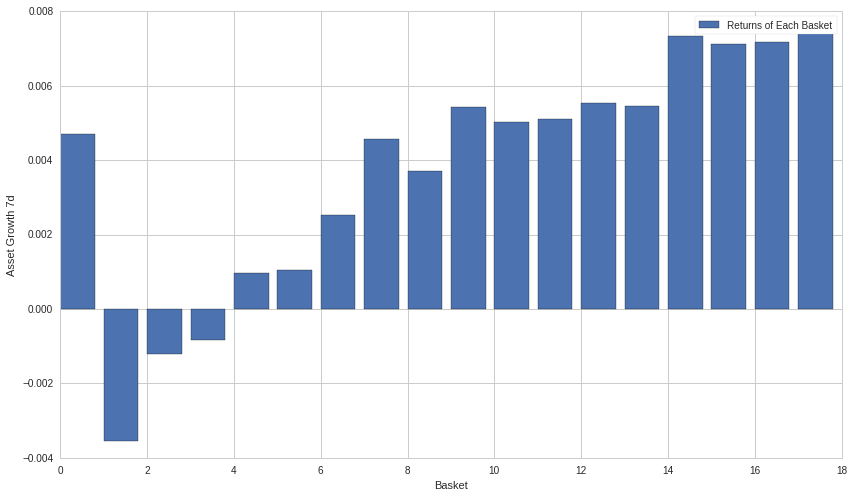

In [24]:
# Rank the equities
ranked_data = pipeline_output.sort('eveb')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.8% entries from factor data: 1.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


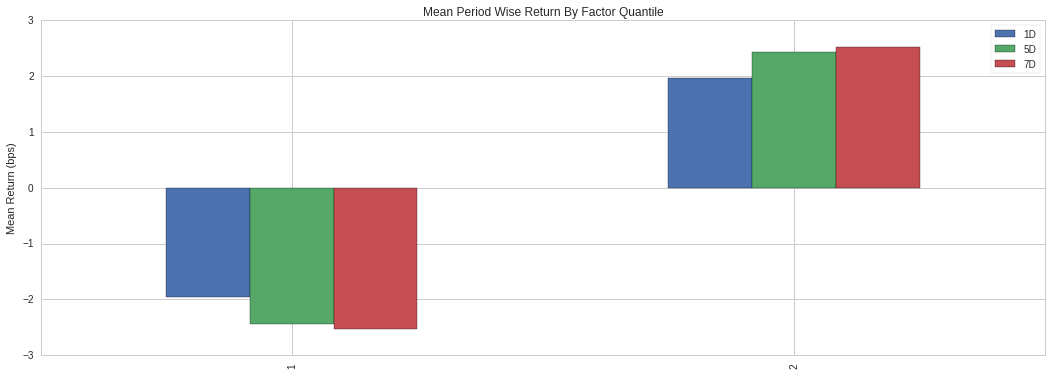

In [25]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['eveb'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

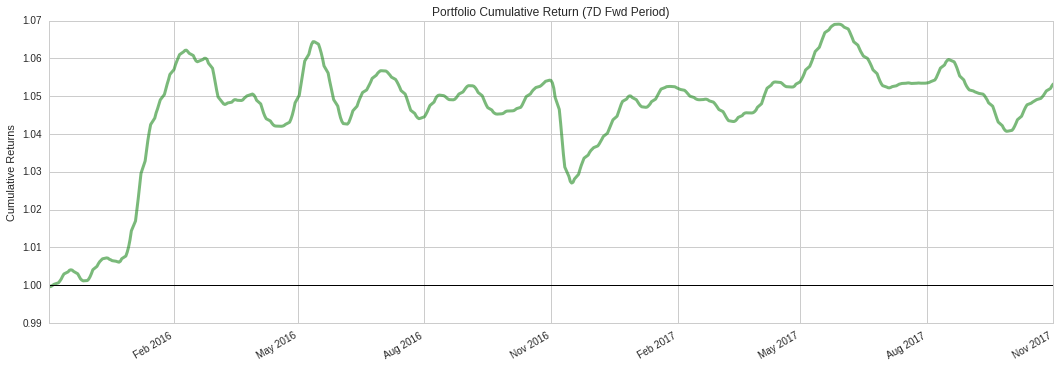

In [26]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#eveb 3

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


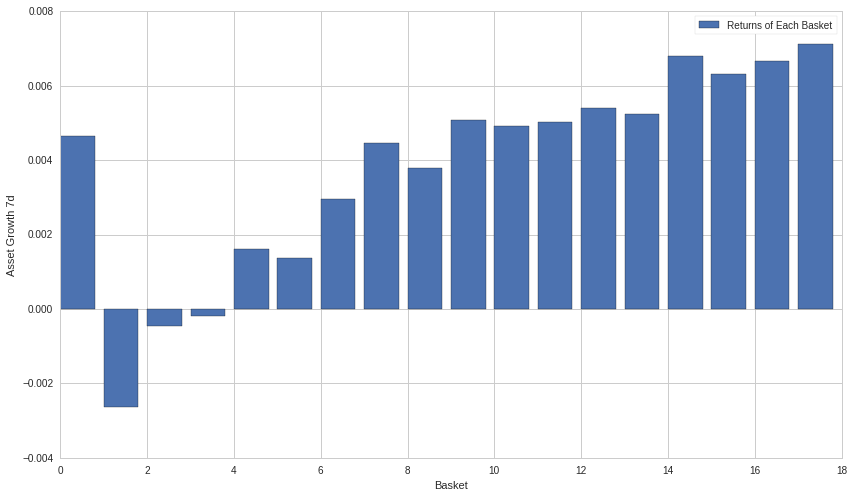

In [27]:
# Rank the equities
ranked_data = pipeline_output.sort('eveb_3')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.8% entries from factor data: 1.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


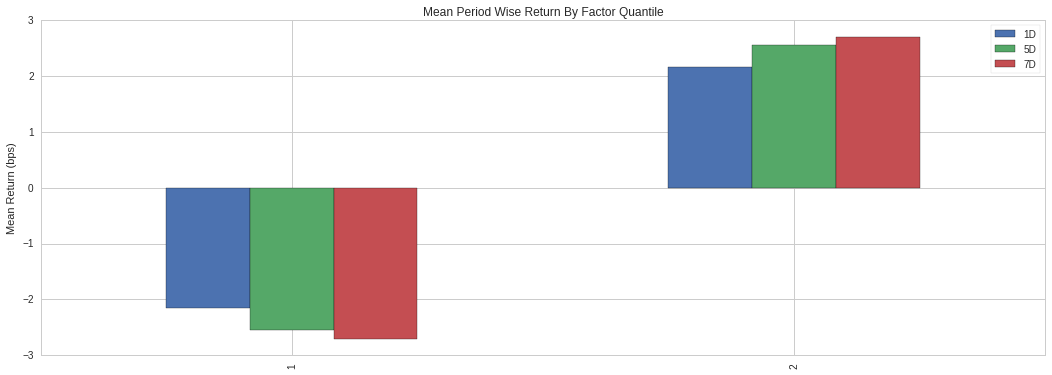

In [28]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['eveb_3'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

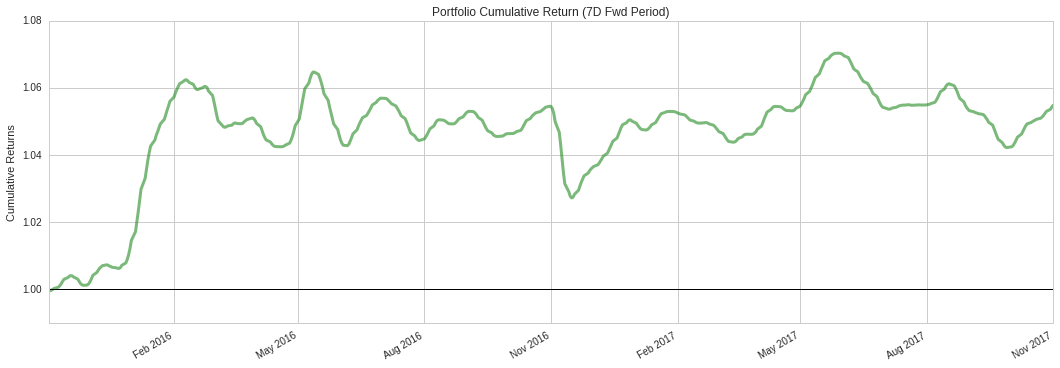

In [29]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#eveb 5

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


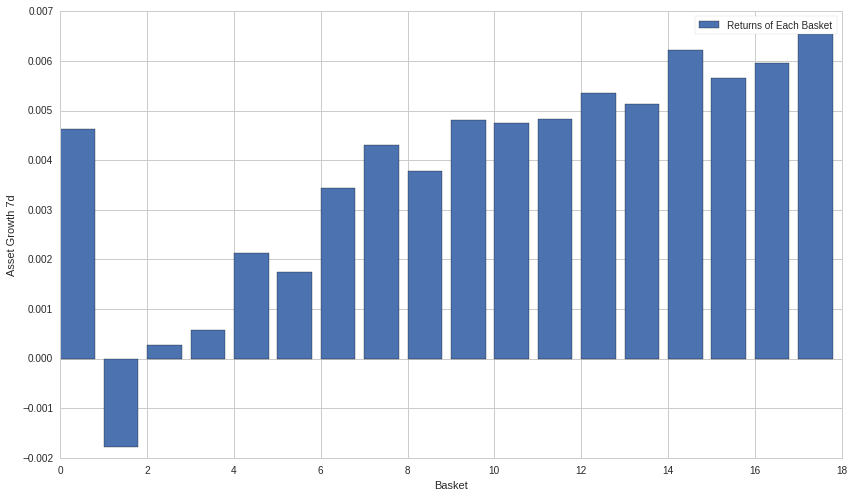

In [30]:
# Rank the equities
ranked_data = pipeline_output.sort('eveb_5')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.8% entries from factor data: 1.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


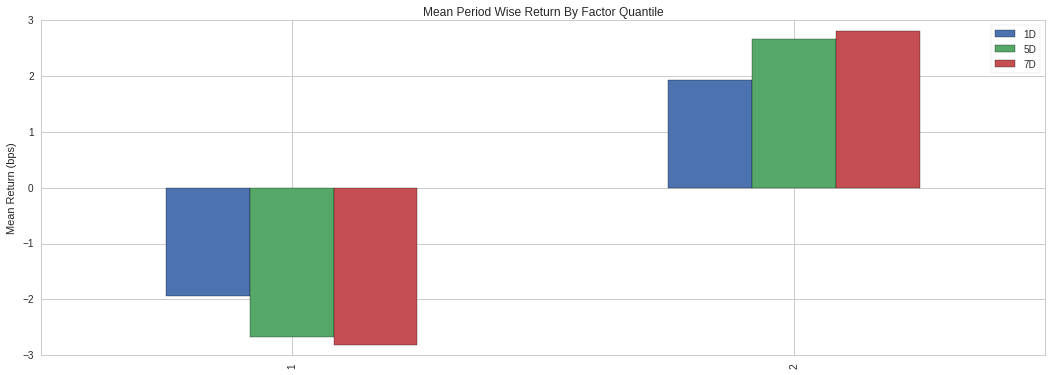

In [31]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['eveb_5'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

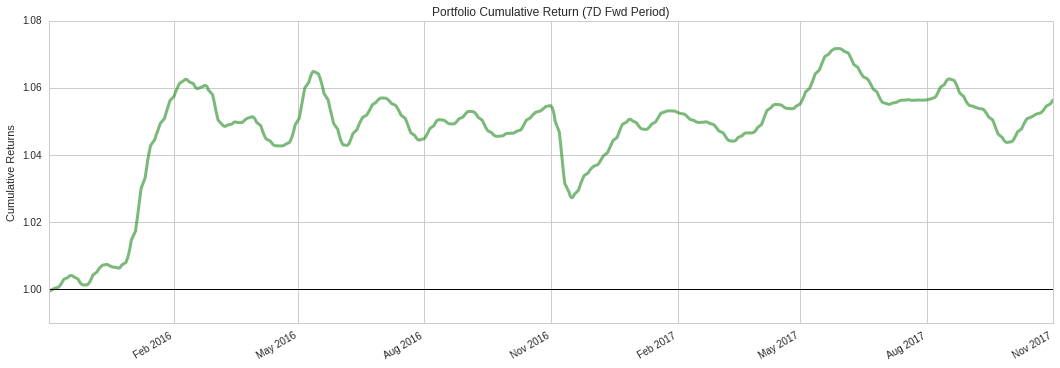

In [32]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#eveb 7

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


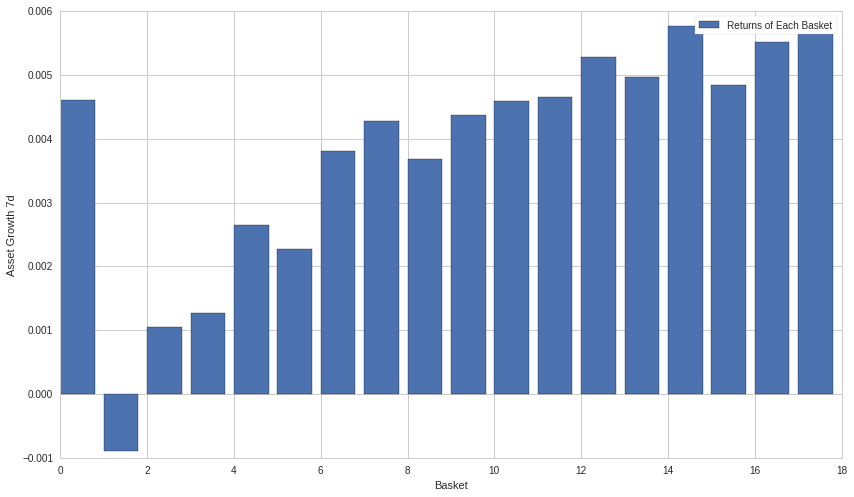

In [33]:
# Rank the equities
ranked_data = pipeline_output.sort('eveb_7')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.8% entries from factor data: 1.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


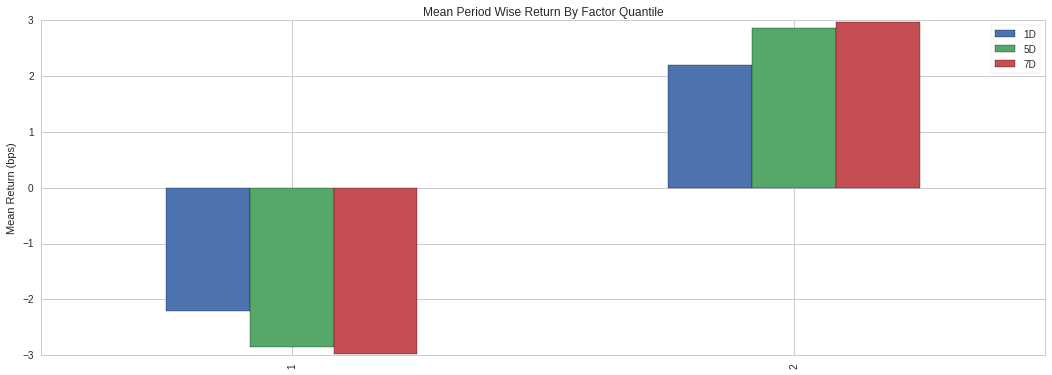

In [34]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['eveb_7'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

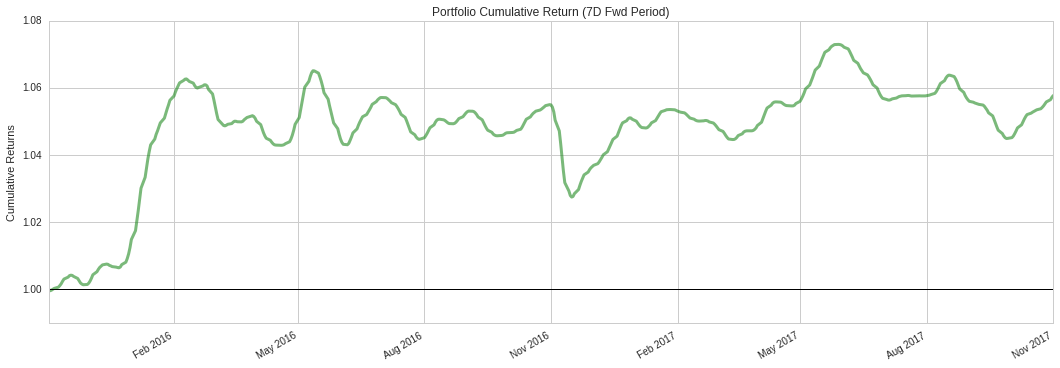

In [35]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#cash return 

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


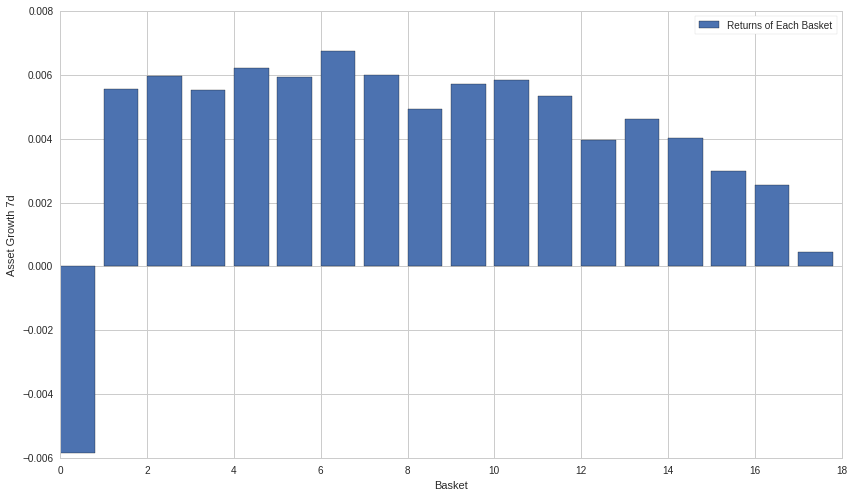

In [36]:
# Rank the equities
ranked_data = pipeline_output.sort('cash_return')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.5% entries from factor data: 1.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


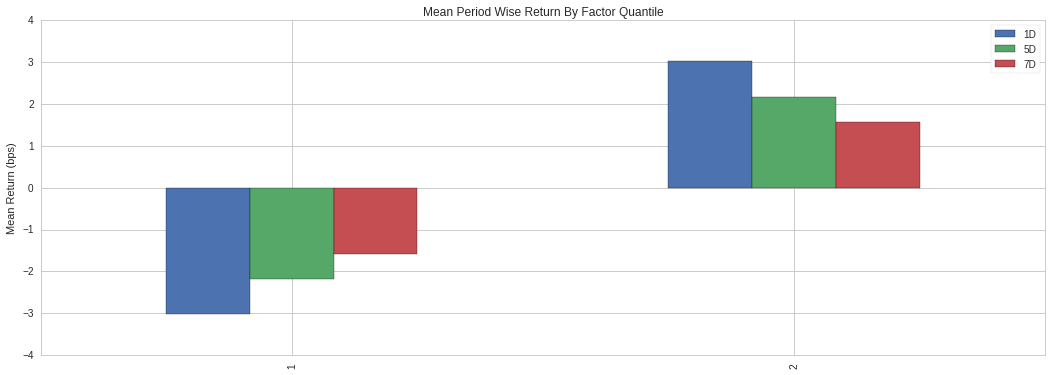

In [37]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['cash_return'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

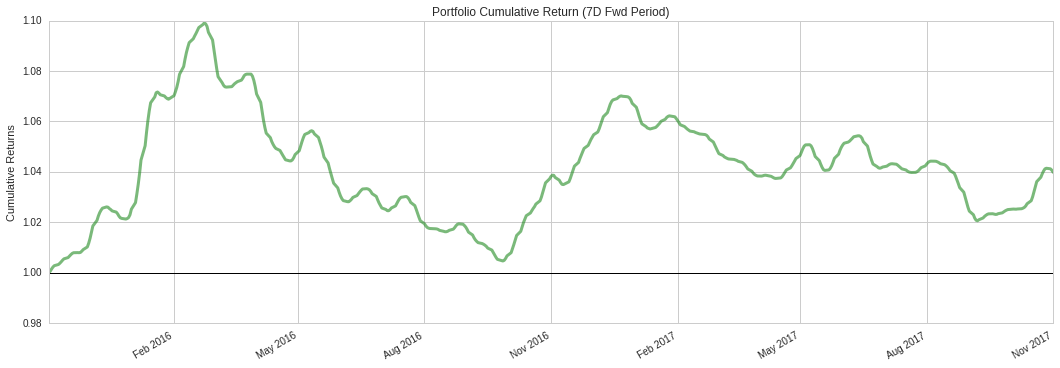

In [38]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#cash return 3

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


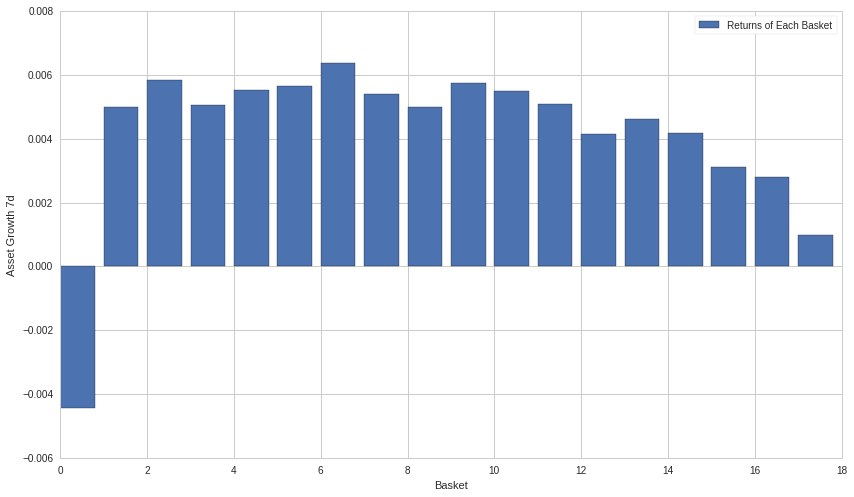

In [39]:
# Rank the equities
ranked_data = pipeline_output.sort('cash_return_3')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.5% entries from factor data: 1.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


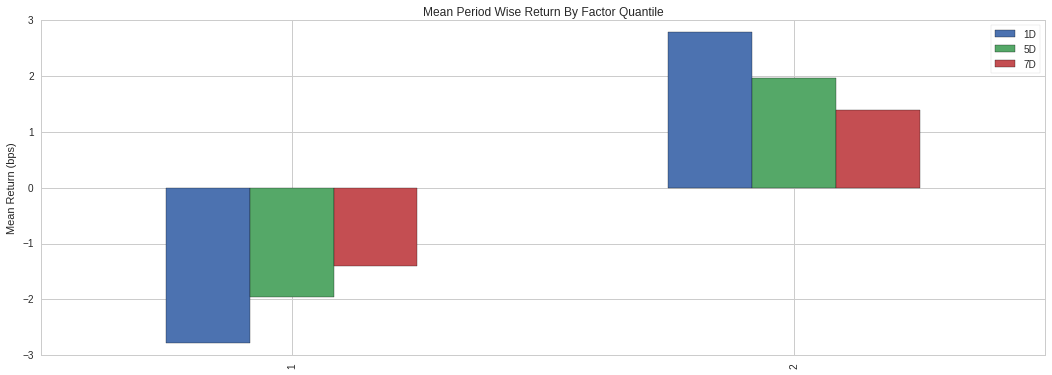

In [40]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['cash_return_3'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

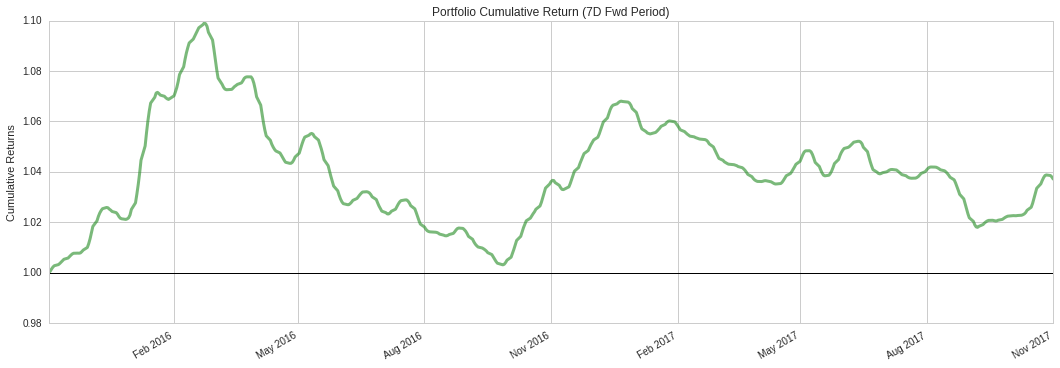

In [41]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#cash return 5

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


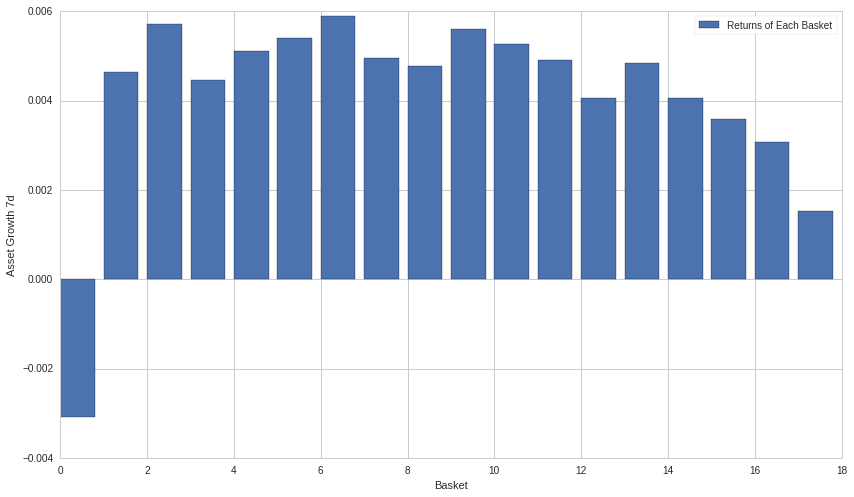

In [42]:
# Rank the equities
ranked_data = pipeline_output.sort('cash_return_5')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.5% entries from factor data: 1.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


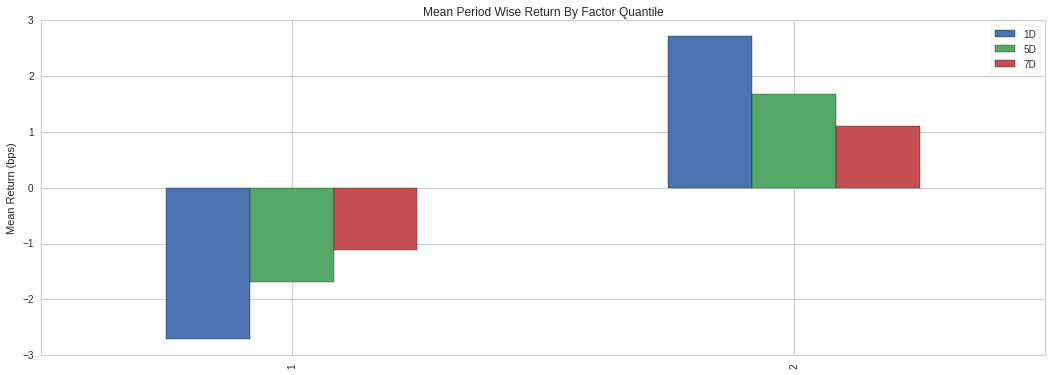

In [43]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['cash_return_5'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

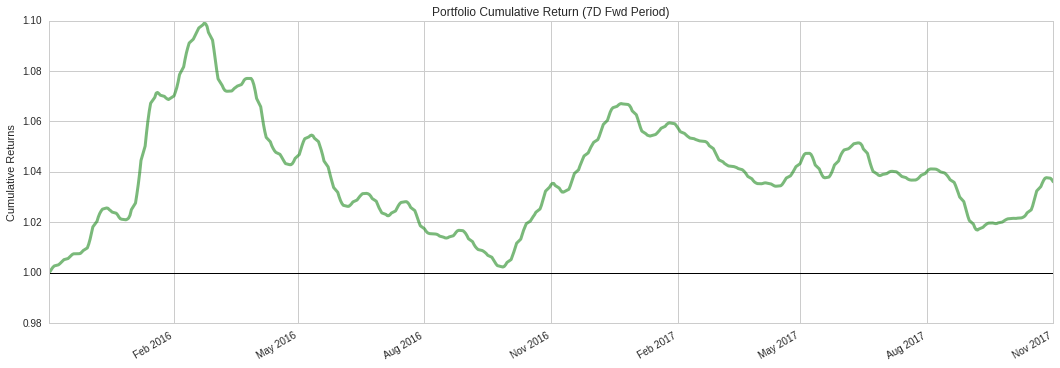

In [44]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#cash return 7

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


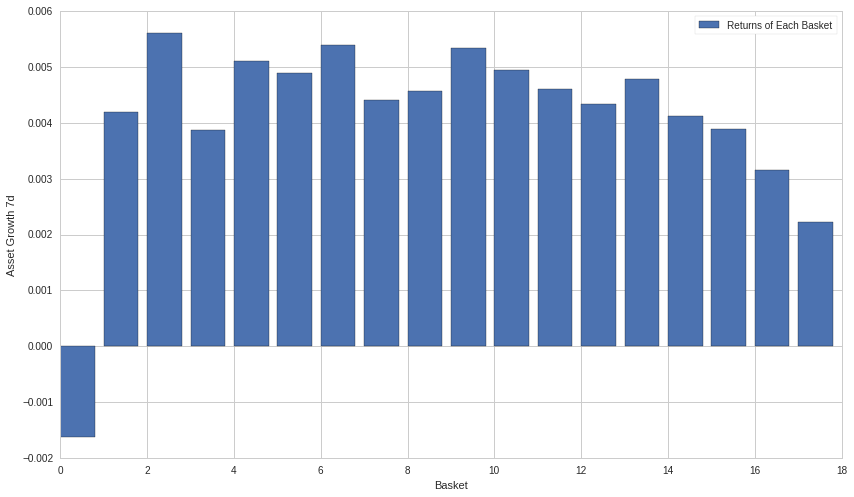

In [45]:
# Rank the equities
ranked_data = pipeline_output.sort('cash_return_7')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.5% entries from factor data: 1.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


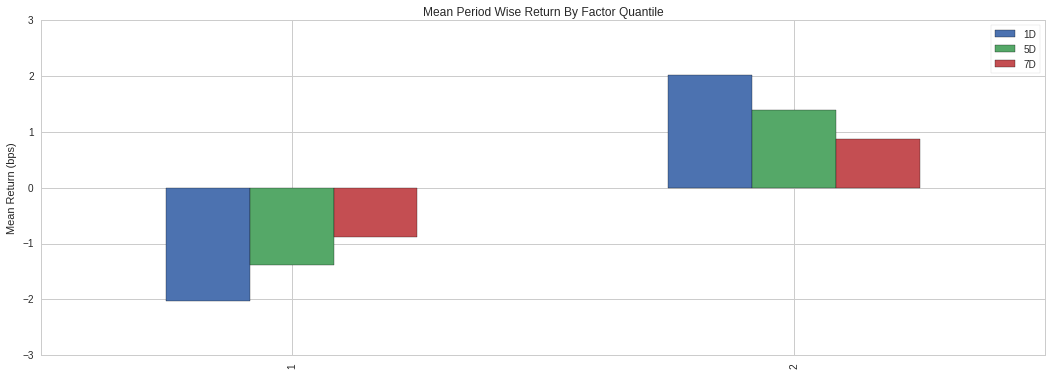

In [46]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['cash_return_7'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

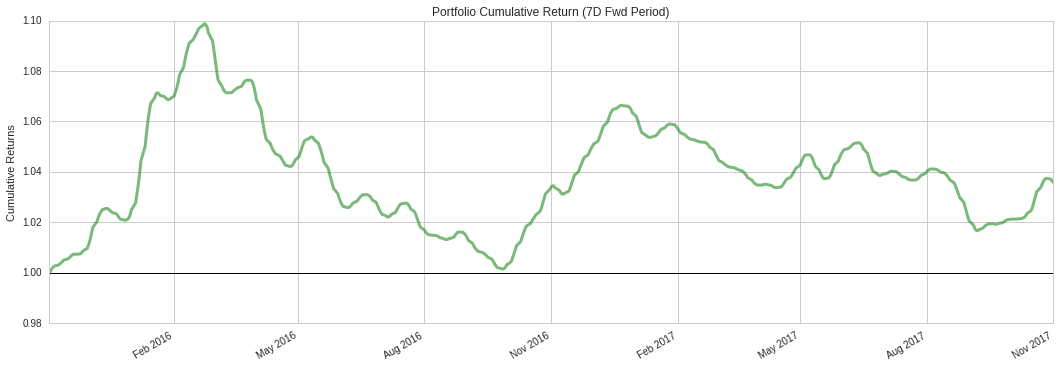

In [47]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#total yield 

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


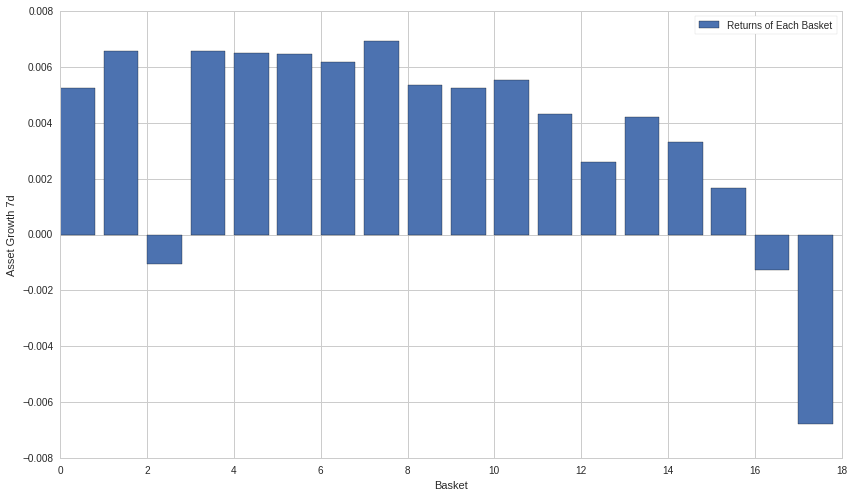

In [48]:
# Rank the equities
ranked_data = pipeline_output.sort('total_yield')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 6.5% entries from factor data: 6.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


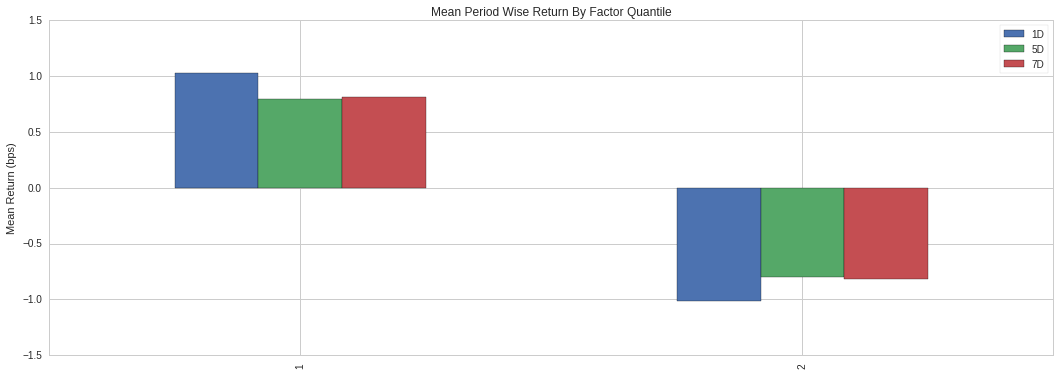

In [49]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['total_yield'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

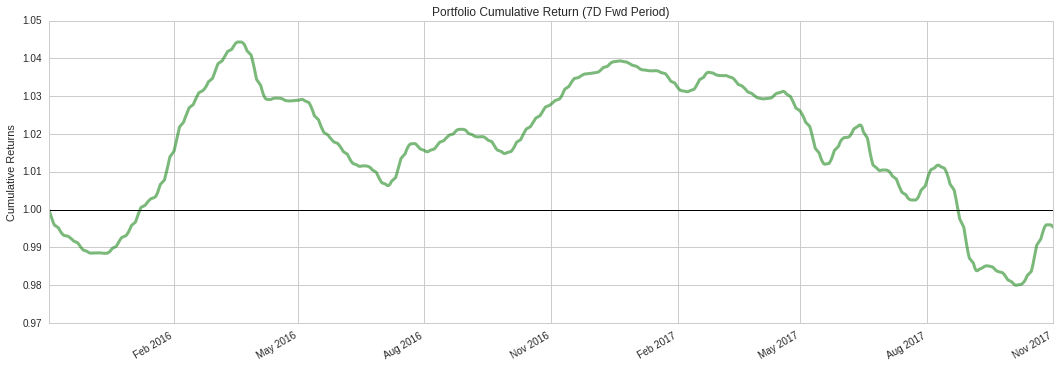

In [50]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#total yield 3

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


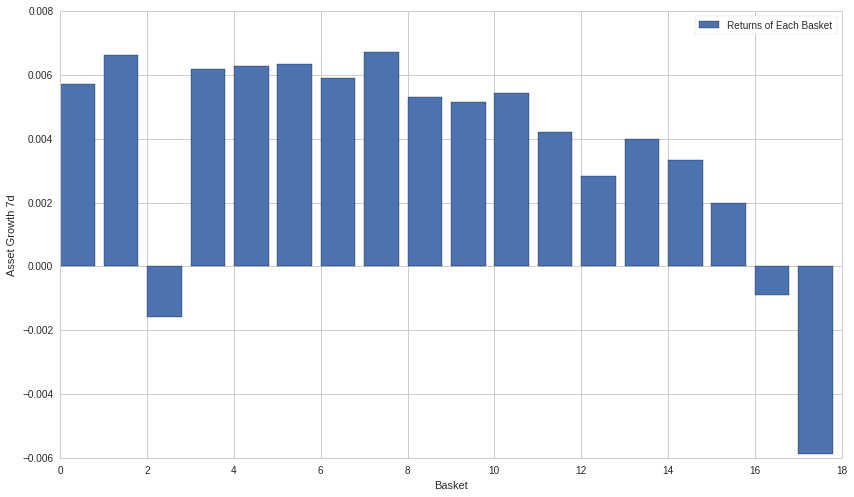

In [51]:
# Rank the equities
ranked_data = pipeline_output.sort('total_yield_3')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 6.5% entries from factor data: 6.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


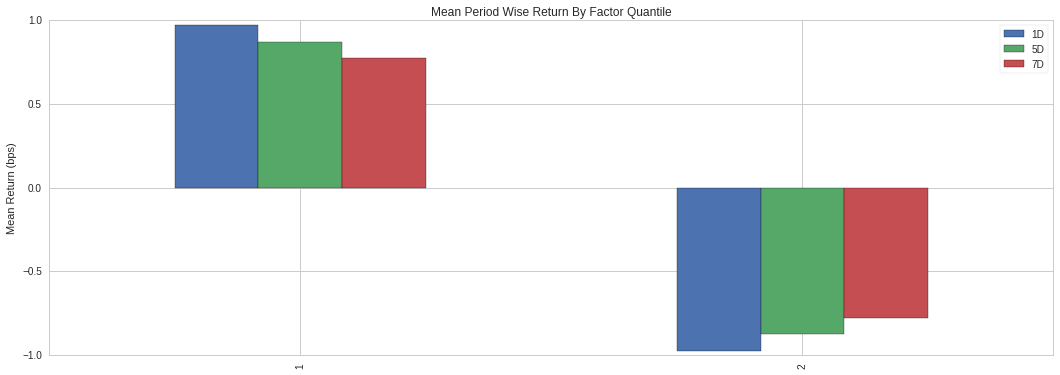

In [52]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['total_yield_3'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

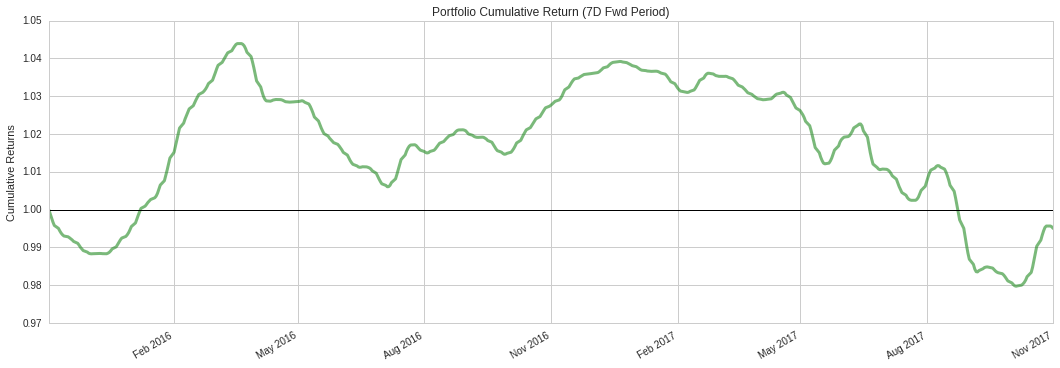

In [53]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#total yield 5

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


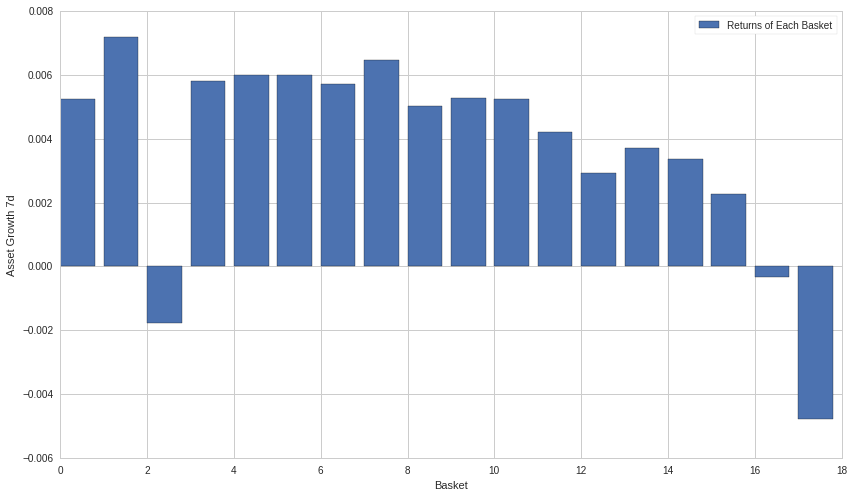

In [54]:
# Rank the equities
ranked_data = pipeline_output.sort('total_yield_5')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 6.5% entries from factor data: 6.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


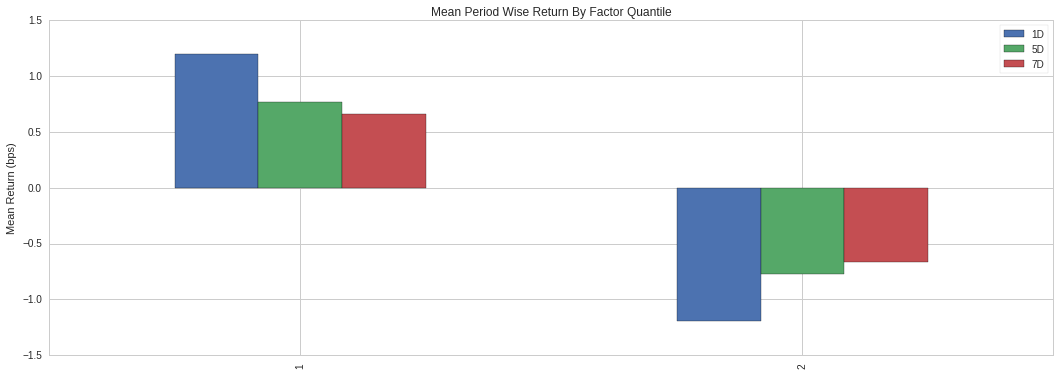

In [55]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['total_yield_5'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

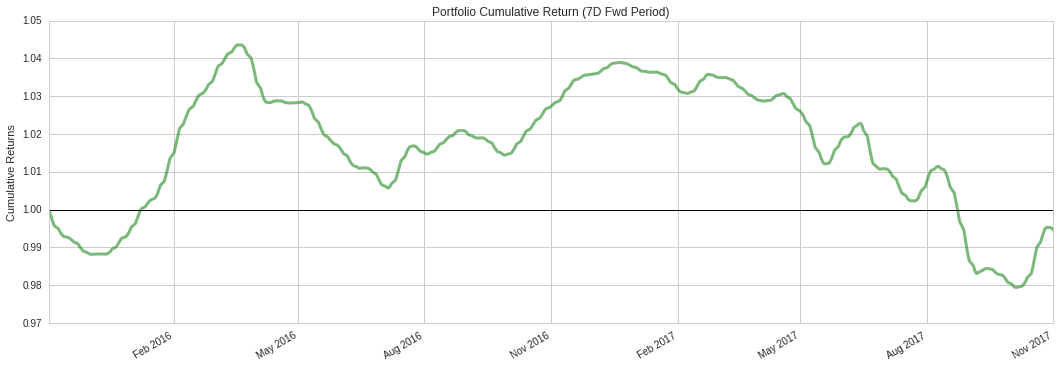

In [56]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#total yield 7

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


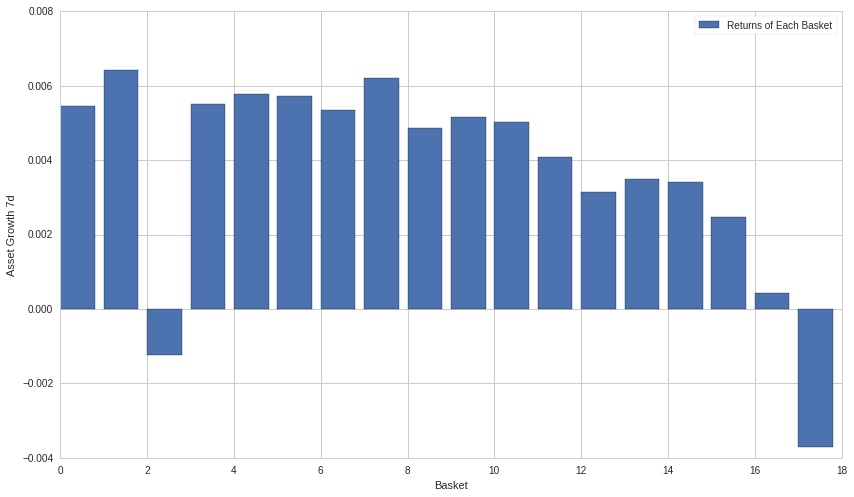

In [57]:
# Rank the equities
ranked_data = pipeline_output.sort('total_yield_7')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 6.5% entries from factor data: 6.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


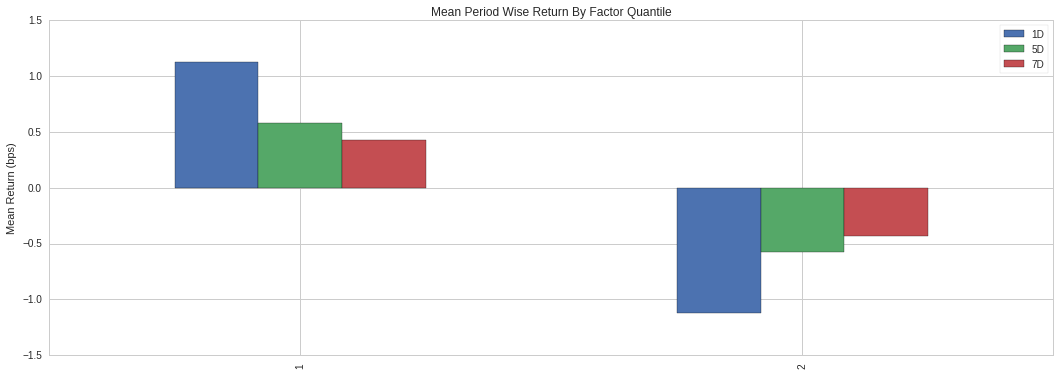

In [58]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['total_yield_7'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

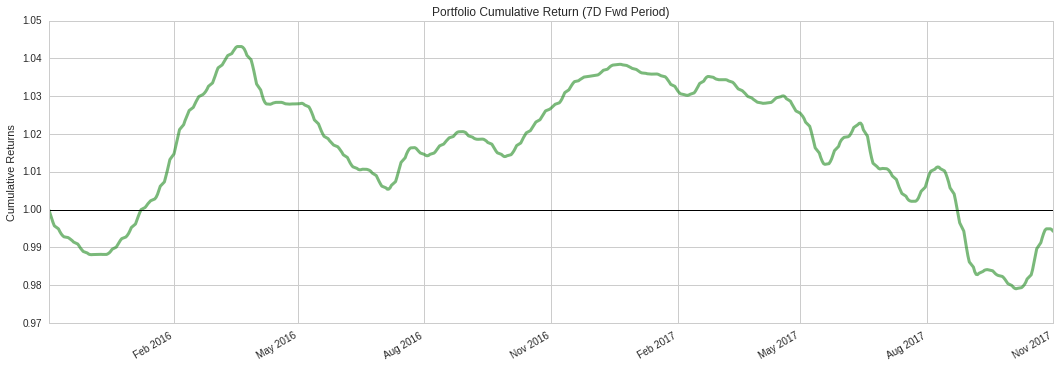

In [59]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#sma 25

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


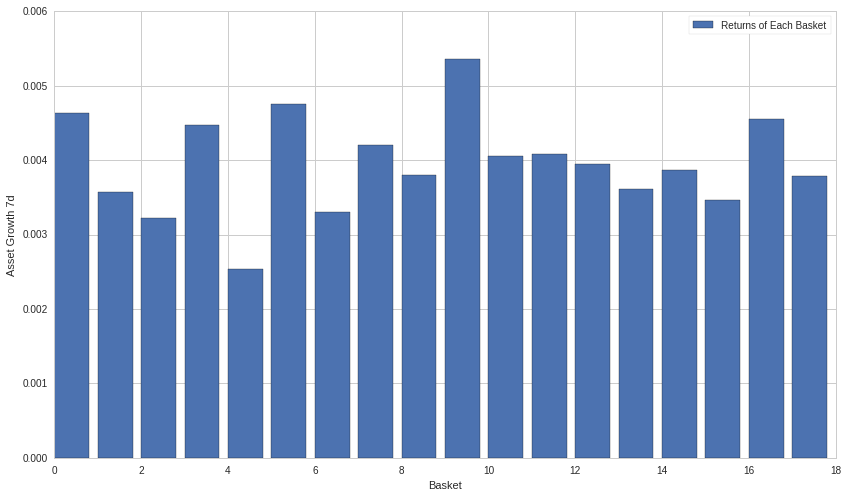

In [60]:
# Rank the equities
ranked_data = pipeline_output.sort('sma_25')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


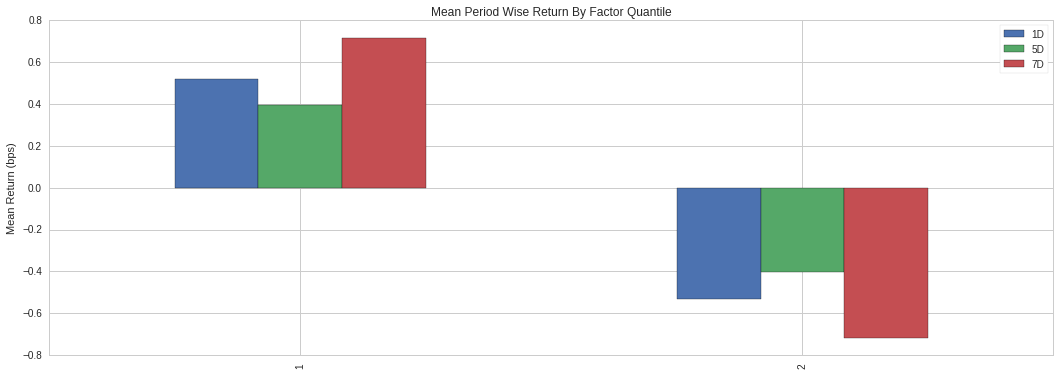

In [61]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['sma_100'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

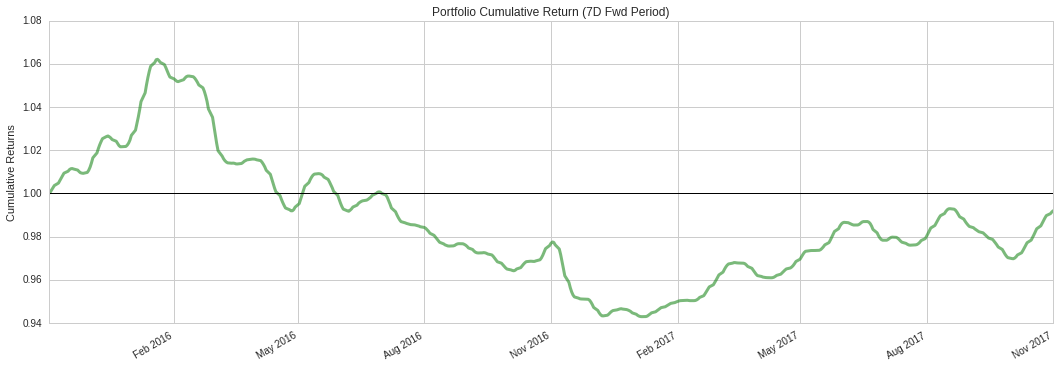

In [62]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());

#sma 100

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


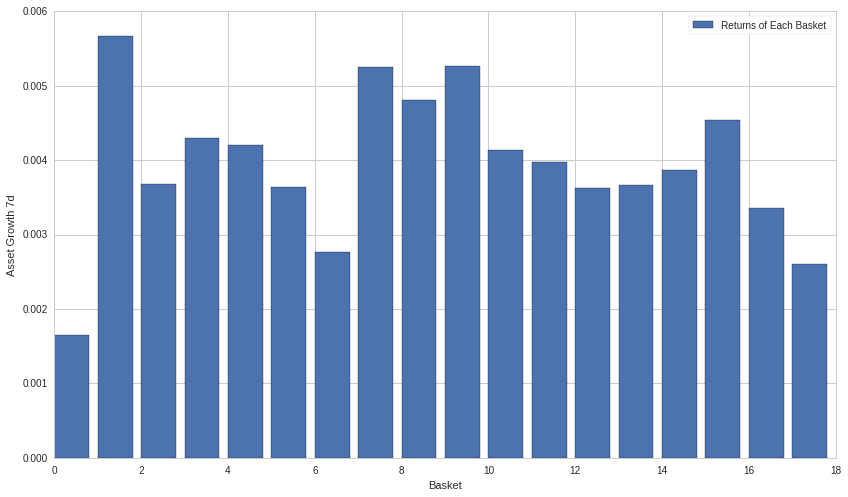

In [63]:
# Rank the equities
ranked_data = pipeline_output.sort('revenue_7')

for i in range(number_of_baskets):
    start = i * basket_size
    end = i * basket_size + basket_size 
    basket_returns[i] = ranked_data[start:end]['Asset Growth 7d'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Asset Growth 7d')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);


Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


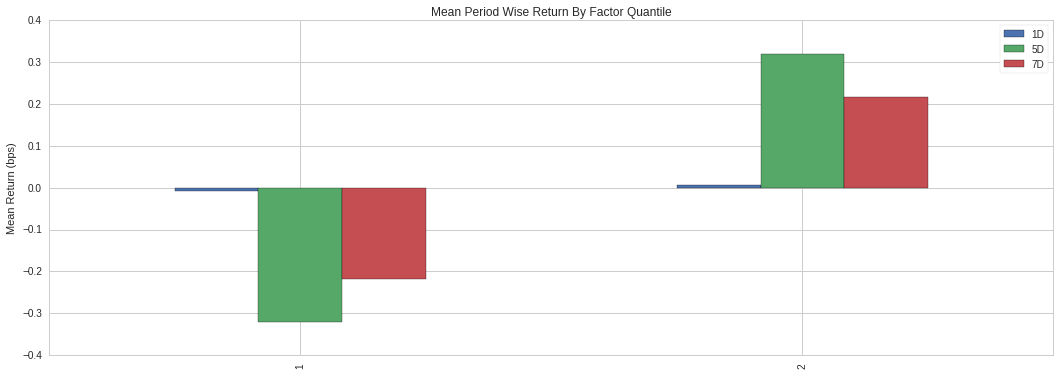

In [64]:
# Get asset forward returns and quantile classification
# based on sentiment scores
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['revenue_7'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,7),
)
# Calculate mean return by factor quantile
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)

# Plot mean returns by quantile and holding period
# over evaluation time range
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('7D',)
    )
);

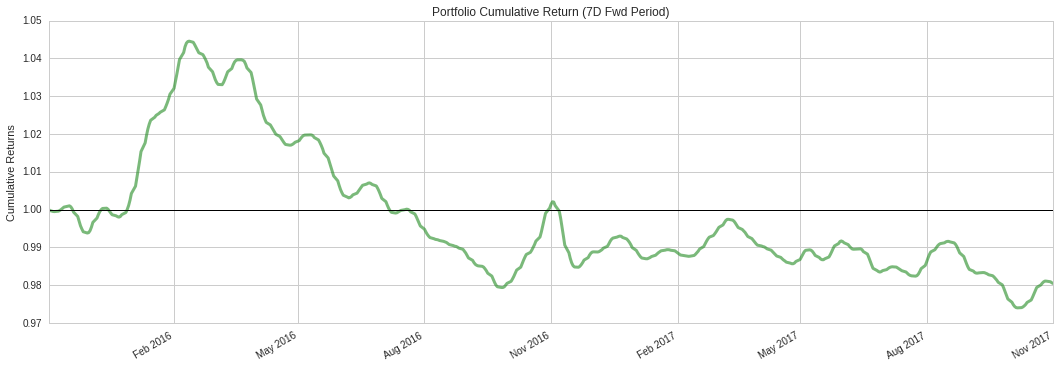

In [65]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5 day holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['7D'], '7D', freq=pd.tseries.offsets.BDay());